# Information Retrieval  

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# Step 1: Pre-processing
# Load the data from the CSV file
df = pd.read_csv("C:/WPy64-31110/notebooks/docs/webmd.csv")

# Handle missing values if any (optional)
df = df.dropna()

# Remove any unnecessary columns (keep only relevant columns)
df = df[['Age','Condition', 'Drug', 'Reviews', 'Satisfaction', 'Sides']]

# Step 2: Text Vectorization
# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Convert the text reviews into numerical vectors
reviews_vectors = vectorizer.fit_transform(df['Reviews'])

# Step 3: Information Extraction
# Extract "Condition," "Drug," "Reviews," "Satisfaction," and "Sides" from the dataset
Age = df['Age']
conditions = df['Condition']
drugs = df['Drug']
reviews = df['Reviews']
satisfaction = df['Satisfaction']
sides = df['Sides']

# Step 4: Information Retrieval
# Create a new DataFrame with the extracted information
extracted_data = pd.DataFrame({
    'Age':Age,
    'Condition': conditions,
    'Drug': drugs,
    'Reviews': reviews,
    'Satisfaction': satisfaction,
    'Sides': sides
})

# Display the extracted DataFrame
print(extracted_data)


               Age      Condition                          Drug  \
0       75 or over    Stuffy Nose                  25dph-7.5peh   
1            25-34  Cold Symptoms                  25dph-7.5peh   
2            65-74          Other  warfarin (bulk) 100 % powder   
3       75 or over          Other  warfarin (bulk) 100 % powder   
4            35-44          Other  warfarin (bulk) 100 % powder   
...            ...            ...                           ...   
362801       55-64   Stop Smoking                       chantix   
362802                      Other                       chantix   
362803       25-34   Stop Smoking                       chantix   
362804       55-64   Stop Smoking                       chantix   
362805       45-54   Stop Smoking                       chantix   

                                                  Reviews  Satisfaction  \
0       I'm a retired physician and of all the meds I ...             5   
1       cleared me right up even with my thro

In [3]:
df.isna().sum()


Age             0
Condition       0
Drug            0
Reviews         0
Satisfaction    0
Sides           0
dtype: int64

In [4]:
# Handling instances with whitespaces
import numpy as np

# Handling instances with whitespaces
for i in df:
    df[i]=np.where(df[i]==" ",np.NAN,df[i])
    
df.isna().sum()


Age             12199
Condition          43
Drug                0
Reviews         41824
Satisfaction        0
Sides           17454
dtype: int64

In [5]:
df.dropna(axis=0, inplace = True)
df.isna().sum()

Age             0
Condition       0
Drug            0
Reviews         0
Satisfaction    0
Sides           0
dtype: int64

In [6]:
df.Age.value_counts()

45-54         67734
55-64         61906
35-44         47548
25-34         44426
65-74         32791
19-24         22253
75 or over    11631
13-18          6311
7-12           1375
3-6             645
0-2             419
Name: Age, dtype: int64

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.boxplot(df["Satisfaction"])
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(df["Satisfaction"])
plt.title(" Histogram")
df.Satisfaction.skew()

-0.11796226728485615

After checking the skewness and outliers satisfaction column has been processed

In [9]:
import pandas as pd

# Load the dataset
data = pd.read_csv("C:/WPy64-31110/notebooks/docs/webmd.csv")

# Group the data by Drug and count the number of reviews for each drug
drug_review_counts = data['Drug'].value_counts()

# Get the top 20 drugs with the most reviews
top_20_drugs = drug_review_counts.head(20)

# Get the corresponding drug names based on DrugId
top_20_drug_names = data[data['Drug'].isin(top_20_drugs.index)]['Drug'].unique()

# Print the top 20 drugs with the most reviews
print("Top 20 drugs with the most reviews:")
for i, drug in enumerate(top_20_drug_names, start=1):
    print(f"{i}. {drug}: {top_20_drugs[drug]} reviews")

Top 20 drugs with the most reviews:
1. lyrica: 3069 reviews
2. lisinopril solution: 4269 reviews
3. lisinopril: 4269 reviews
4. lexapro: 4134 reviews
5. neurontin capsule: 2078 reviews
6. prednisone concentrate: 2576 reviews
7. prednisone tablet, delayed release (enteric coated): 2576 reviews
8. prednisone: 2576 reviews
9. phentermine hcl: 2367 reviews
10. seroquel: 2446 reviews
11. zoloft: 2662 reviews
12. trazodone hcl: 2099 reviews
13. tramadol hcl er: 2932 reviews
14. tramadol hcl: 2932 reviews
15. topamax capsule, sprinkle: 2148 reviews
16. topamax: 2148 reviews
17. effexor xr: 3486 reviews
18. hydrocodone-acetaminophen: 3944 reviews
19. cymbalta: 4648 reviews
20. celexa: 2224 reviews


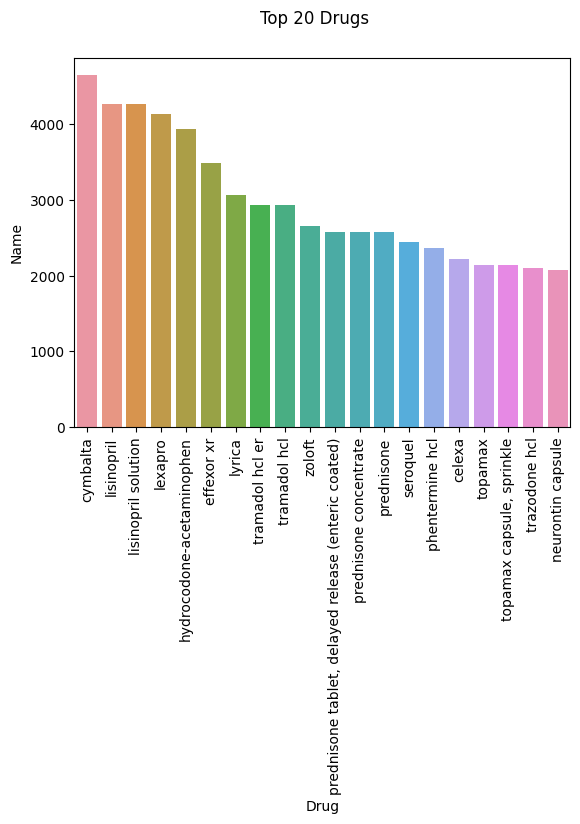

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv("C:/WPy64-31110/notebooks/docs/webmd.csv")

# Count the occurrences of each drug and select the top 20
df = df['Drug'].value_counts().head(20).reset_index()
df.columns = ['Drug', 'Name']

# Create a bar plot using Seaborn
sns.barplot(data=df, x='Drug', y='Name')
plt.suptitle("Top 20 Drugs")
plt.xticks(rotation=90, fontsize=10)
plt.show()




cymbalta tops the list followed by Lisinopril. It is to be noted that all the 20 drugs has been used by more than atleast 100 people¶

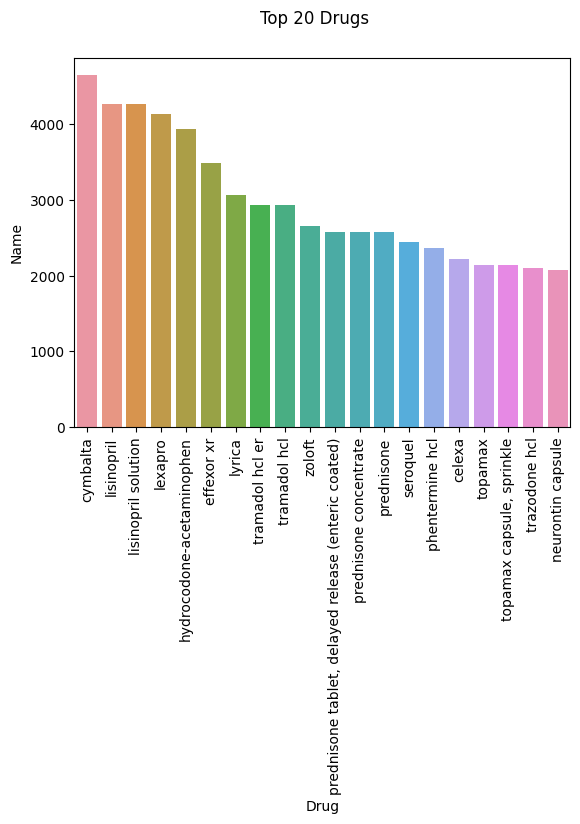

The top condition for cymbalta is: Major Depressive Disorder


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv("C:/WPy64-31110/notebooks/docs/webmd.csv")

# Count the occurrences of each drug and select the top 20
df_drugs = df['Drug'].value_counts().head(20).reset_index()
df_drugs.columns = ['Drug', 'Name']

# Create a bar plot using Seaborn for the top 20 drugs
sns.barplot(data=df_drugs, x='Drug', y='Name')
plt.suptitle("Top 20 Drugs")
plt.xticks(rotation=90, fontsize=10)
plt.show()

# Find the top condition for a specific drug (e.g., "Cymbalta")
target_drug = "cymbalta"
target_conditions = df[df['Drug'] == target_drug]['Condition']
if not target_conditions.empty:
    top_condition = target_conditions.value_counts().idxmax()
    print(f"The top condition for {target_drug} is: {top_condition}")
else:
    print(f"No conditions found for {target_drug}.")



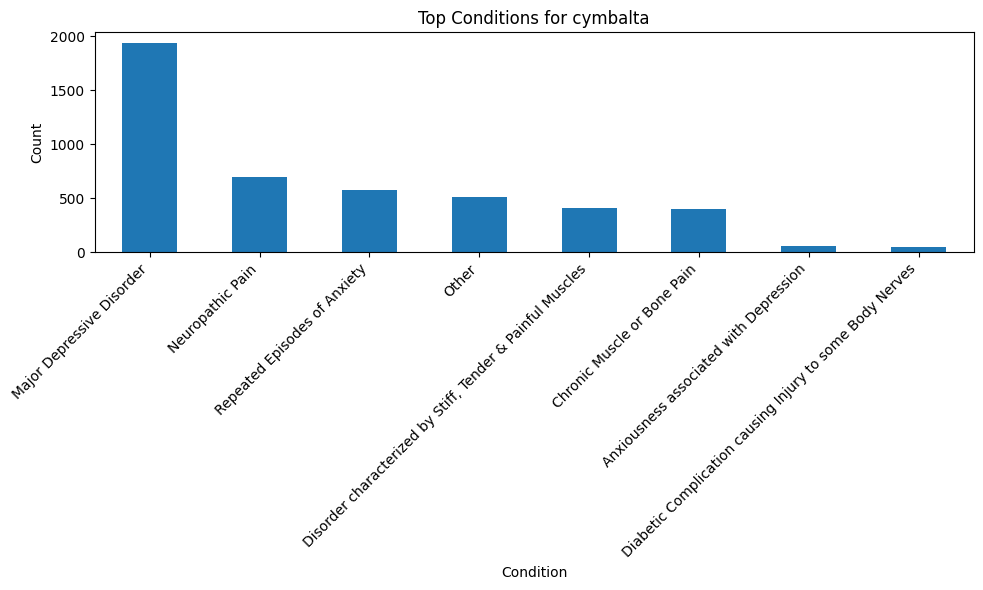

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv("C:/WPy64-31110/notebooks/docs/webmd.csv")

# Filter the DataFrame for the "Cymbalta" drug
target_drug = "cymbalta"
cymbalta_conditions = df[df['Drug'] == target_drug]['Condition']

# Count the occurrences of each condition
condition_counts = cymbalta_conditions.value_counts()

# Check if there are conditions to plot
if not condition_counts.empty:
    # Plot a histogram for the top conditions
    plt.figure(figsize=(10, 6))
    condition_counts.head(20).plot(kind='bar')
    plt.title(f"Top Conditions for {target_drug}")
    plt.xlabel("Condition")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print(f"No conditions found for {target_drug}.")




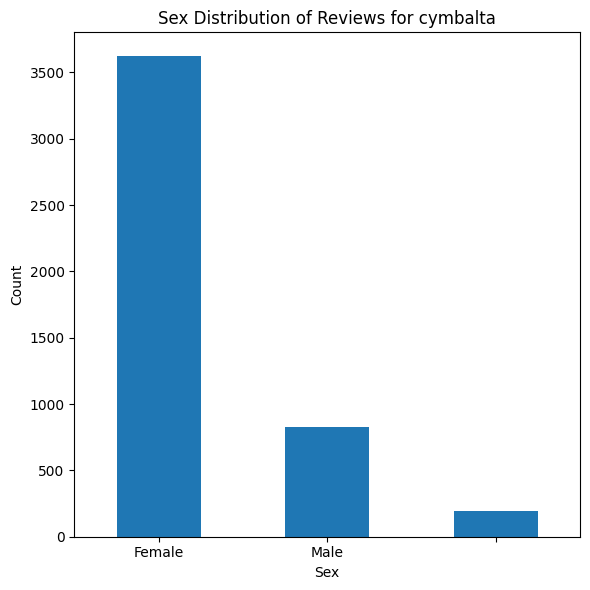

The sex that gave the most reviews for cymbalta is: Female


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv("C:/WPy64-31110/notebooks/docs/webmd.csv")

# Filter the DataFrame for the "Cymbalta" drug
target_drug = "cymbalta"
cymbalta_reviews = df[df['Drug'] == target_drug]

# Count the occurrences of each sex in the reviews
sex_counts = cymbalta_reviews['Sex'].value_counts()

# Plot a bar plot for the sex distribution
plt.figure(figsize=(6, 6))
sex_counts.plot(kind='bar')
plt.title(f"Sex Distribution of Reviews for {target_drug}")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Find the sex with the most reviews
most_reviewed_sex = sex_counts.idxmax()
print(f"The sex that gave the most reviews for {target_drug} is: {most_reviewed_sex}")


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
csv_path = "C:/Users/Computing/Downloads/webmd.csv"
df = pd.read_csv(csv_path)

# Filter the DataFrame for the "Cymbalta" drug
target_drug = "cymbalta"
cymbalta_reviews = df[df['Drug'] == target_drug]

# Compile a regular expression pattern for the drug name
drug_pattern = re.compile(r'\b' + re.escape(target_drug) + r'\b', re.IGNORECASE)

# Extract sentences containing the drug and their side effects
matched_sentences = []
for review in cymbalta_reviews['Reviews']:
    sentences = re.split(r'[.!?]', review)  # Split review into sentences
    for sentence in sentences:
        if drug_pattern.search(sentence):
            matched_sentences.append(sentence.strip())

# Print the matched sentences
for idx, sentence in enumerate(matched_sentences, start=1):
    print(f"{idx}. {sentence}")

# Create a list of side effects from the "SideEffects" column
side_effects_list = cymbalta_reviews['Sides'].dropna().tolist()

# Concatenate all side effects into a single string
all_side_effects = ','.join(side_effects_list)

# Print the side effects
print("\nSide Effects:")
print(all_side_effects)


1. I was prescribed Cymbalta for anxiety and started out with a low dosage for a couple of weeks
2. Effexor was relatively good for me but I feel less anxious and have a better overall sense of well being on cymbalta
3. I have depression, anxiety, Fibro, severe muscle spasms, diabetic neuropathy and was given Cymbalta
4. Cymbalta was prescribed for depression
5. I've been on Cymbalta (generic) for approx a year now, yes I need to go back to my physician
6. If you have relied on cymbalta as much as I have, tapering off this medication was extremely difficult
7. Cymbalta has given me more energy and pain is gone
8. ve been prescribed Cymbalta since 2002 for Fibromyalgia but I found that it also helps greatly with my depression
9. d prescribe the name brand Cymbalta again and write a letter to my insurance as why I needed to be on the name brand
10. After two weeks of taking Cymbalta again I felt like myself again
11. My Fibromyalgia makes me hurt of course but the Cymbalta helps a great 

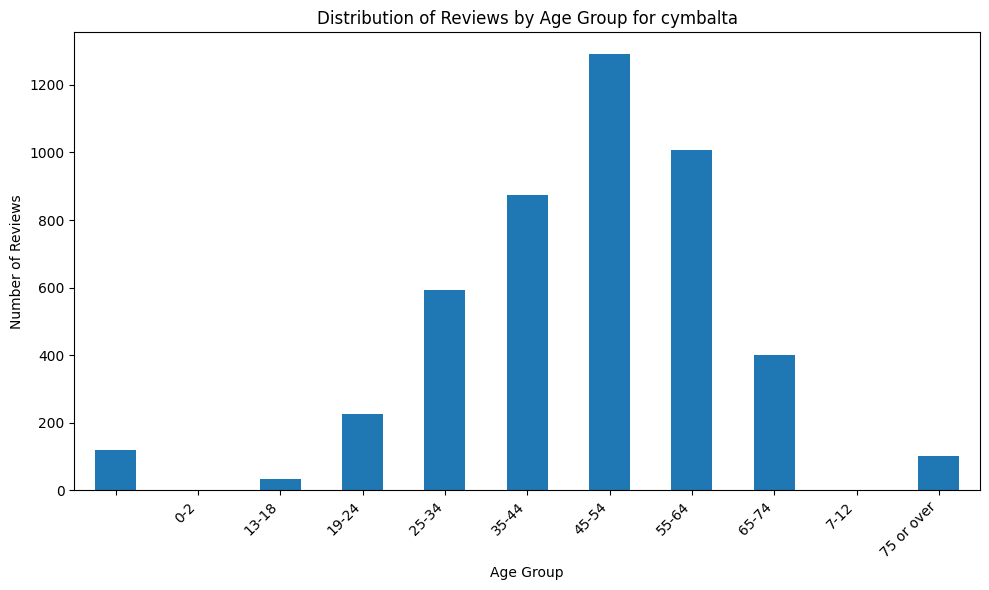

The age group that gave the most reviews for cymbalta is: 45-54


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv("C:/WPy64-31110/notebooks/docs/webmd.csv")

# Filter the DataFrame for the "Cymbalta" drug
target_drug = "cymbalta"
cymbalta_reviews = df[df['Drug'] == target_drug]

# Count the occurrences of each age group in the reviews
age_counts = cymbalta_reviews['Age'].value_counts()

# Determine the age group with the highest count
most_common_age_group = age_counts.idxmax()

# Plot the distribution of reviews by age group
plt.figure(figsize=(10, 6))
age_counts.sort_index().plot(kind='bar')
plt.title(f"Distribution of Reviews by Age Group for {target_drug}")
plt.xlabel("Age Group")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"The age group that gave the most reviews for {target_drug} is: {most_common_age_group}")


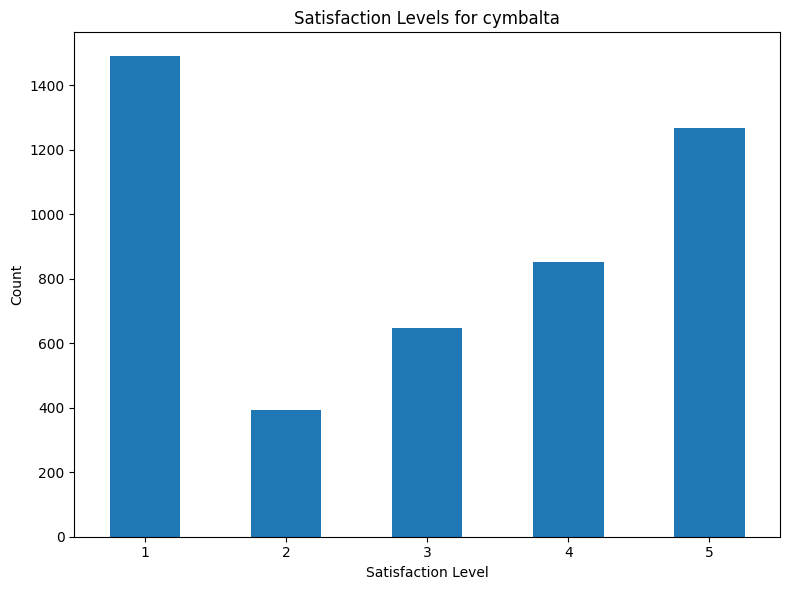

The satisfaction level with the most reviews for cymbalta is: 1


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv("C:/WPy64-31110/notebooks/docs/webmd.csv")

# Filter the DataFrame for the "Cymbalta" drug
target_drug = "cymbalta"
cymbalta_reviews = df[df['Drug'] == target_drug]

# Count the occurrences of each satisfaction level
satisfaction_counts = cymbalta_reviews['Satisfaction'].value_counts()

# Plot a bar plot for satisfaction levels
plt.figure(figsize=(8, 6))
satisfaction_counts.sort_index().plot(kind='bar')
plt.title(f"Satisfaction Levels for {target_drug}")
plt.xlabel("Satisfaction Level")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Find the satisfaction level with the most reviews
most_common_satisfaction = satisfaction_counts.idxmax()
print(f"The satisfaction level with the most reviews for {target_drug} is: {most_common_satisfaction}")


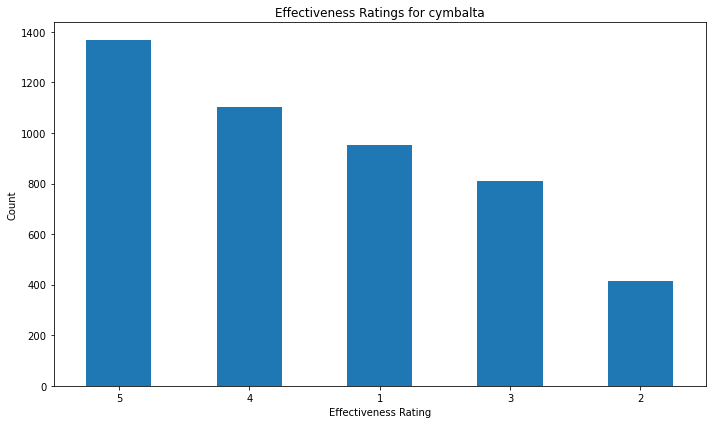

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv("C:/Users/Computing/Downloads/webmd.csv")

# Filter the DataFrame for the "Cymbalta" drug
target_drug = "cymbalta"
cymbalta_effectiveness = df[df['Drug'] == target_drug]['Effectiveness']

# Count the occurrences of each effectiveness rating
effectiveness_counts = cymbalta_effectiveness.value_counts()

# Check if there are effectiveness ratings to plot
if not effectiveness_counts.empty:
    # Plot a histogram for the top effectiveness ratings
    plt.figure(figsize=(10, 6))
    effectiveness_counts.plot(kind='bar')
    plt.title(f"Effectiveness Ratings for {target_drug}")
    plt.xlabel("Effectiveness Rating")
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print(f"No effectiveness ratings found for {target_drug}.")


# Function to generate plots based on user-selected drug name,side effect and satifaction 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Computing\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Select a drug from the list:
1. 25dph-7.5peh
2. warfarin (bulk) 100 % powder
3. wymzya fe
4. 12 hour nasal relief spray, non-aerosol
5. pyrogallol crystals
6. lyza
7. lysiplex plus liquid
8. lysteda
9. pyrithione zinc shampoo
10. lysine acetate 4,000 mg oral powder packet
11. lynparza tablet
12. lynparza
13. lymphazurin vial
14. lyrica
15. lysodren
16. lydia pinkham herbal
17. pyrithione zinc bar
18. lycopene
19. pyrilamine-chlophedianol liquid
20. pyrilamine maleate powder
21. pyridoxine hcl
22. pyridostigmine bromide solution
23. pyridostigmine bromide
24. pyridostigmine bromide (bulk) 100 % powder
25. pyrethrins-piperonyl butoxide shampoo
26. pyrantel pamoate suspension
27. pyrazinamide
28. pyridium
29. pylera
30. luxiq foam
31. luxamend cream
32. lmx 5 cream
33. lmx 4 cream
34. loestrin
35. lo-zumandimine (28) 3 mg-0.02 mg tablet contraceptives
36. loxapine
37. low-ogestrel
38. low dose aspirin ec
39. lovenox syringe
40. lovaza
41. lovastatin tablet, extended release 24 hr
42. lova

2979. trinessa lo
2980. trimo-san jelly with applicator
2981. trimethoprim (bulk) 100 % powder
2982. trimipramine maleate
2983. trimethoprim
2984. trilyte with flavor packets
2985. trimethobenzamide hcl
2986. tri-luma cream
2987. tri-lo-sprintec
2988. tri-linyah
2989. tri-lo-estarylla
2990. tri-lo-marzia
2991. trilipix
2992. trileptal suspension, (final dose form)
2993. tri-legest fe
2994. triglide
2995. trihexyphenidyl hcl
2996. trigels-f forte
2997. trileptal
2998. trifluoperazine hcl
2999. trifluridine drops
3000. triesence vial
3001. tri-estarylla
3002. triderm cream
3003. tricor
3004. tricitrates
3005. tricon
3006. tpn electrolytes vial
3007. trichlormethiazide (bulk) 100 % powder
3008. tri-chlor solution, non-
3009. tricare prenatal dha one
3010. triazolam
3011. tribenzor
3012. triamterene-hydrochlorothiazid
3013. trianex ointment
3014. triaminic daytime cold-cough
3015. triamterene 100 mg capsule diuretics
3016. triamcinolone-dimeth-silicone kit
3017. yellow fever vaccine live (

6207. desonide ointment
6208. desonide, micronized (bulk) powder
6209. desonide lotion
6210. desoximetasone ointment
6211. desonide foam
6212. desogestrel-ethinyl estradiol
6213. desonate gel
6214. desogestr-eth estrad eth estra
6215. desmopressin spray, non-aerosol
6216. desogen
6217. desmopressin acetate aerosol, spray with pump antidiuretic hormone
6218. desmopressin acetate ampul
6219. desmopressin acetate
6220. desmopressin 10 mcg/spray (0.1 ml) nasal spray (non-refrigerated)
6221. desitin paste
6222. desitin cream
6223. desloratadine
6224. desmopressin 0.1 mg/ml (refrigerate) nasal solution
6225. desipramine hcl
6226. desipramine powder
6227. desgen
6228. desferal mesylate vial
6229. dermotic drops
6230. desenex 2 % topical powder
6231. descovy
6232. dermend cream
6233. dermazinc spray, non-aerosol
6234. dermazene cream
6235. dermatop cream
6236. dermatop ointment
6237. dermazinc bar
6238. dermasorb ta cream
6239. dermasorb hc combination package, cleanser and lotion
6240. dermas

Enter the number of the drug: 8


C:\Users\Computing\AppData\Local\Temp\ipykernel_17360\2664524173.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_data["Sides_Tokenized"] = drug_data["Sides"].apply(word_tokenize)
C:\Users\Computing\AppData\Local\Temp\ipykernel_17360\2664524173.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_data["Condition_Tokenized"] = drug_data["Condition"].apply(word_tokenize)
C:\Users\Computing\AppData\Local\Temp\ipykernel_17360\2664524173.py:20: SettingWithCopyWarning: 
A value is trying to be set o

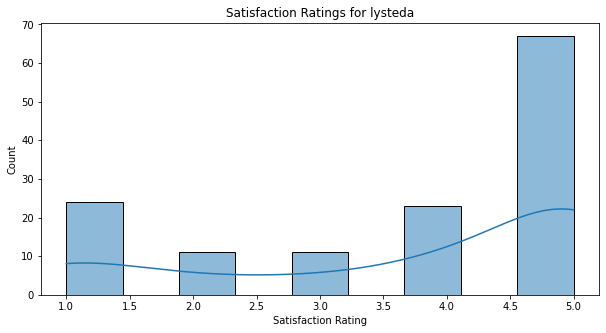

NameError: name 'Counter' is not defined

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
# Load the data from the CSV file
df = pd.read_csv("C:/Users/Computing/Downloads/webmd.csv")

# Download NLTK resources
nltk.download('punkt')

# Function to generate plots based on user-selected drug name
def generate_plots(drug_name):
    # Filter the data for the selected drug
    drug_data = df[df["Drug"] == drug_name]

    # Tokenize side effects, conditions, and similar drugs
    drug_data["Sides_Tokenized"] = drug_data["Sides"].apply(word_tokenize)
    drug_data["Condition_Tokenized"] = drug_data["Condition"].apply(word_tokenize)
    drug_data["Drug_Tokenized"] = drug_data["Drug"].apply(word_tokenize)

    # Plot satisfaction ratings
    plt.figure(figsize=(10, 5))
    sns.histplot(drug_data["Satisfaction"], kde=True)
    plt.xlabel("Satisfaction Rating")
    plt.title(f"Satisfaction Ratings for {drug_name}")
    plt.show()

    # Plot individual side effects
    all_side_effects = [token for sublist in drug_data["Sides_Tokenized"] for token in sublist]
    side_effect_counts = Counter(all_side_effects)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(side_effect_counts.keys()), y=list(side_effect_counts.values()))
    plt.xticks(rotation=90)
    plt.xlabel("Side Effect")
    plt.ylabel("Count")
    plt.title(f"Individual Side Effects for {drug_name}")
    plt.show()

    # Plot ranked conditions treated
    conditions_counts = drug_data["Condition"].value_counts().sort_values(ascending=False)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=conditions_counts.index, y=conditions_counts.values)
    plt.xticks(rotation=90)
    plt.xlabel("Condition")
    plt.ylabel("Count")
    plt.title(f"Ranked Condition for {drug_name}")
    plt.show()

    # Plot ranked conditions treated
    conditions_counts = drug_data["Condition"].value_counts().sort_values(ascending=False)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=conditions_counts.index, y=conditions_counts.values)
    plt.xticks(rotation=90)
    plt.xlabel("Condition")
    plt.ylabel("Count")
    plt.title(f"Ranked Condition for {drug_name}")
    plt.show()

    # Plot ranked similar drugs
    similar_drugs_counts = drug_data["Drug"].value_counts().sort_values(ascending=False)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=similar_drugs_counts.index, y=similar_drugs_counts.values)
    plt.xticks(rotation=90)
    plt.xlabel("Drug")
    plt.ylabel("Count")
    plt.title(f"Ranked Drug for {drug_name}")
    plt.show()

# Get a list of unique drug names
drug_names = df["Drug"].unique()

# Prompt the user to select a drug from the list
print("Select a drug from the list:")
for i, name in enumerate(drug_names, 1):
    print(f"{i}. {name}")

selected_index = int(input("Enter the number of the drug: ")) - 1
selected_drug = drug_names[selected_index]



# Generate plots for the selected drug

generate_plots(selected_drug)



# Sentiment analysis

In [20]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv("C:/WPy64-31110/notebooks/docs/webmd.csv")

# Print the first few rows (head) of the dataset
print(data.head())


          Age      Condition       Date                          Drug  DrugId  \
0  75 or over    Stuffy Nose  9/21/2014                  25dph-7.5peh  146724   
1       25-34  Cold Symptoms  1/13/2011                  25dph-7.5peh  146724   
2       65-74          Other  7/16/2012  warfarin (bulk) 100 % powder  144731   
3  75 or over          Other  9/23/2010  warfarin (bulk) 100 % powder  144731   
4       35-44          Other   1/6/2009  warfarin (bulk) 100 % powder  144731   

   EaseofUse  Effectiveness  \
0          5              5   
1          5              5   
2          2              3   
3          2              2   
4          1              1   

                                             Reviews  Satisfaction     Sex  \
0  I'm a retired physician and of all the meds I ...             5    Male   
1  cleared me right up even with my throat hurtin...             5  Female   
2  why did my PTINR go from a normal of 2.5 to ov...             3  Female   
3             

In [25]:
import pandas as pd

# List of columns you want to select
columns = ["Age", "Condition", "Drug", "DrugId", "Satisfaction", "Sex", "Reviews"]

# Load the data from the CSV file, selecting only specific columns
df = pd.read_csv("C:/WPy64-31110/notebooks/docs/webmd.csv", usecols=columns)

# Print the first few rows (head) of the dataset
print(data.head())


          Age      Condition       Date                          Drug  DrugId  \
0  75 or over    Stuffy Nose  9/21/2014                  25dph-7.5peh  146724   
1       25-34  Cold Symptoms  1/13/2011                  25dph-7.5peh  146724   
2       65-74          Other  7/16/2012  warfarin (bulk) 100 % powder  144731   
3  75 or over          Other  9/23/2010  warfarin (bulk) 100 % powder  144731   
4       35-44          Other   1/6/2009  warfarin (bulk) 100 % powder  144731   

   EaseofUse  Effectiveness  \
0          5              5   
1          5              5   
2          2              3   
3          2              2   
4          1              1   

                                             Reviews  Satisfaction     Sex  \
0  I'm a retired physician and of all the meds I ...             5    Male   
1  cleared me right up even with my throat hurtin...             5  Female   
2  why did my PTINR go from a normal of 2.5 to ov...             3  Female   
3             

In [26]:
df.isnull().sum()

Age              0
Condition        0
Drug             0
DrugId           0
Reviews         37
Satisfaction     0
Sex              0
dtype: int64

In [27]:
df = df.dropna()

In [28]:
for col in df.columns:
    if df[col].dtype.kind == "O":
        df[col] = df[col].str.strip()

# WordCloud without preprocessing the dataset 

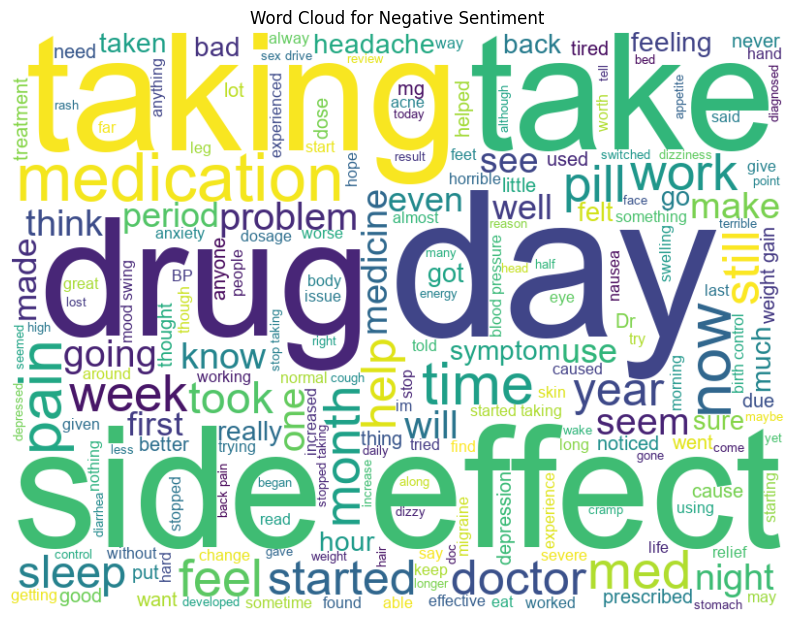

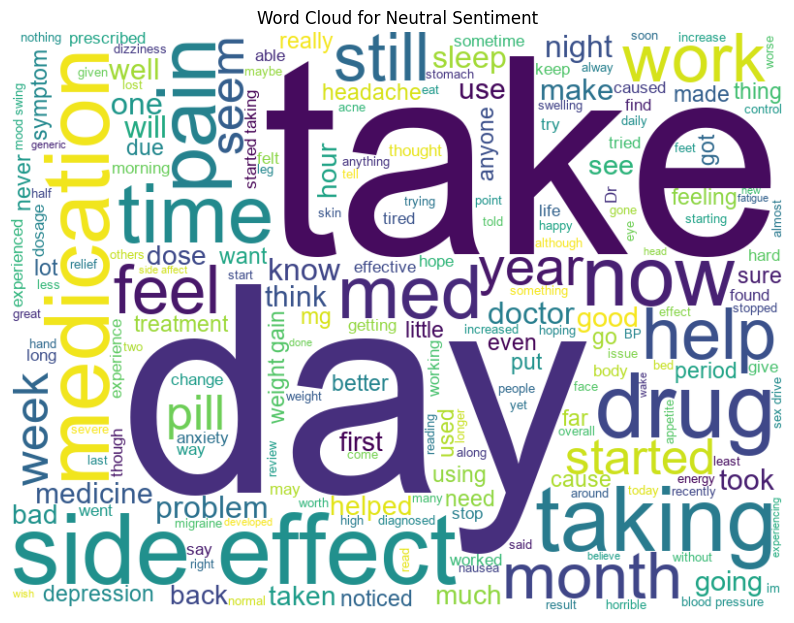

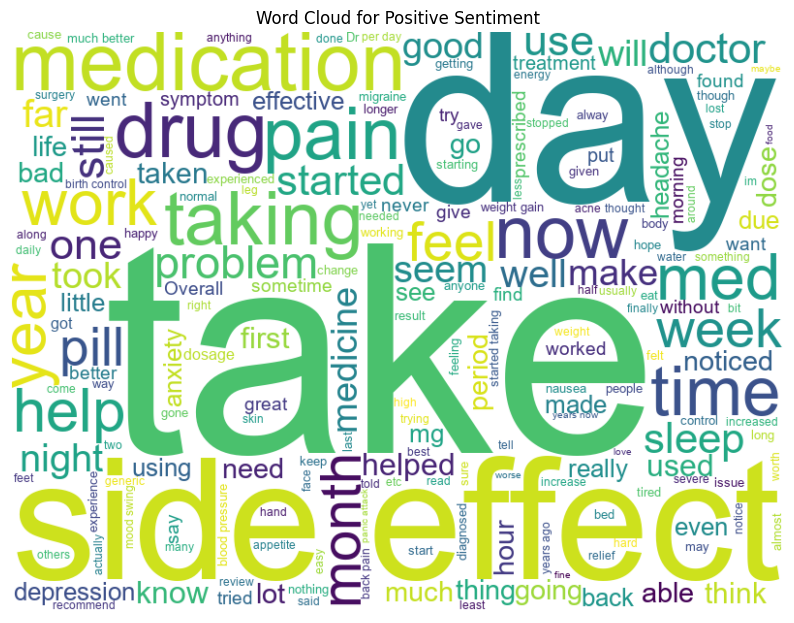

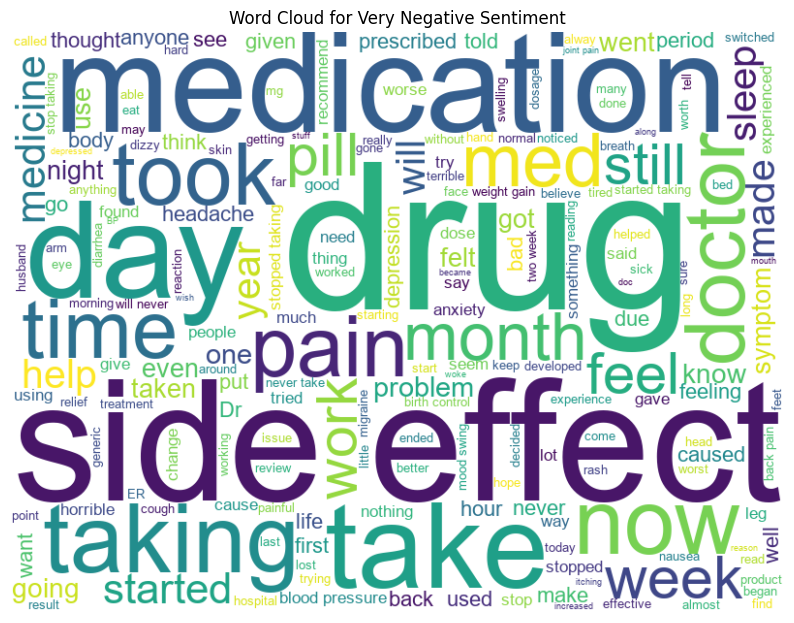

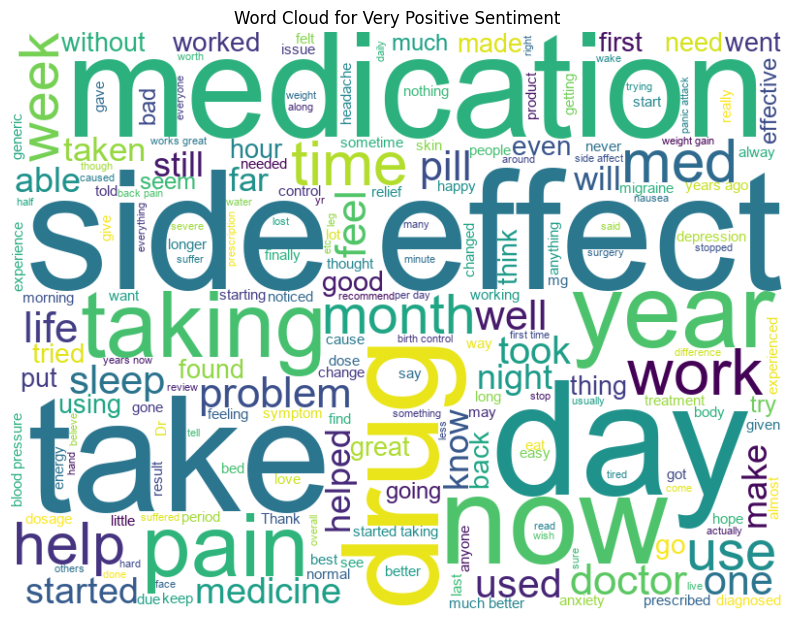

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the data from the CSV file
data = pd.read_csv("C:/WPy64-31110/notebooks/docs/webmd.csv")


# Define a function to categorize sentiment
def categorize_sentiment(satisfaction):
    if satisfaction == 1:
        return "Very Negative"
    elif satisfaction == 2:
        return "Negative"
    elif satisfaction == 3:
        return "Neutral"
    elif satisfaction == 4:
        return "Positive"
    elif satisfaction == 5:
        return "Very Positive"
    else:
        return None  # Handle other cases if needed

# Apply the sentiment categorization to the DataFrame
data['SentimentCategory'] = data['Satisfaction'].apply(categorize_sentiment)
# Convert 'Reviews' column to strings
data['Reviews'] = data['Reviews'].astype(str)

# Group reviews by sentiment category and handle NaN values
grouped_reviews = data.groupby('SentimentCategory')['Reviews'].apply(lambda x: ' '.join(x.dropna()))

# Generate and display Word Clouds for each sentiment category
for sentiment_category, reviews in grouped_reviews.items():
    wordcloud = WordCloud(width=800, height=600, background_color='white', font_path='arial.ttf').generate(reviews)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment_category} Sentiment')
    plt.axis('off')
    plt.show()

For a quick visualization I use word clouds. Word clouds have an appeal that is hard to deny, they are engaging and easy for the brain to digest but word clouds may not be too revealing,

# WordCloud After preprocessing the  reviews dataset 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


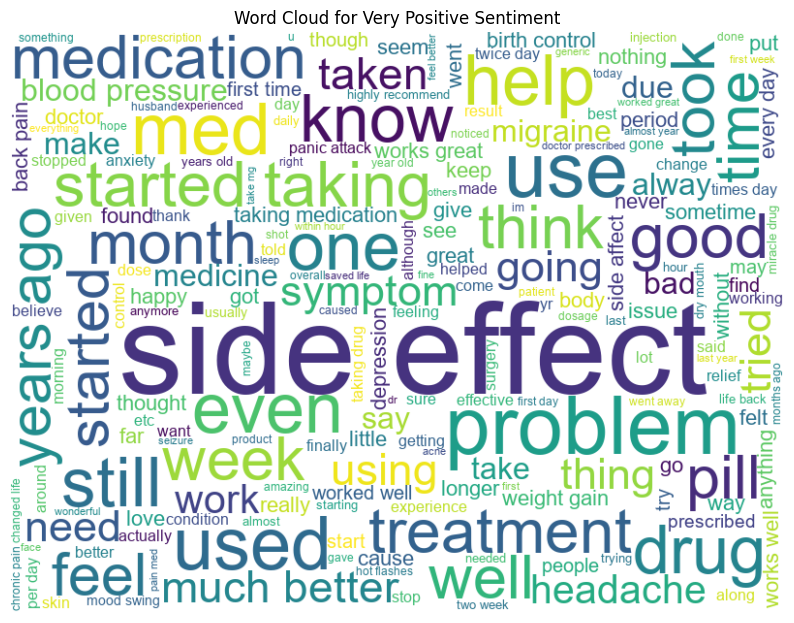

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the data from the CSV file
data = pd.read_csv("C:/WPy64-31110/notebooks/docs/webmd.csv")

# Clean and preprocess the data
data.dropna(subset=['Reviews'], inplace=True)  # Remove rows with missing reviews
data['Reviews'] = data['Reviews'].str.lower()  # Convert text to lowercase

# Define a function to remove punctuation and stopwords
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(filtered_words)

data['CleanedReviews'] = data['Reviews'].apply(preprocess_text)

# Define a function to categorize sentiment
def categorize_sentiment(satisfaction):
    if satisfaction == 1:
        return "Very Negative"
    elif satisfaction == 2:
        return "Negative"
    elif satisfaction == 3:
        return "Neutral"
    elif satisfaction == 4:
        return "Positive"
    elif satisfaction == 5:
        return "Very Positive"
    else:
        return None  # Handle other cases if needed

# Apply the sentiment categorization to the DataFrame
data['SentimentCategory'] = data['Satisfaction'].apply(categorize_sentiment)

# Group cleaned reviews by sentiment category
grouped_reviews = data.groupby('SentimentCategory')['CleanedReviews'].apply(lambda x: ' '.join(x))

# Generate and display Word Clouds for each sentiment category
for sentiment_category, reviews in grouped_reviews.items():
    wordcloud = WordCloud(width=800, height=600, background_color='white', font_path='arial.ttf').generate(reviews)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment_category} Sentiment')
    plt.axis('off')
    plt.show()


In [3]:
import pandas as pd

# Load the dataset
data =pd.read_csv("C:/WPy64-31110/notebooks/docs/webmd.csv")

# Clean up the 'Reviews' column by removing leading and trailing whitespace
data['Reviews'] = data['Reviews'].str.strip()

# Drop rows with empty 'Reviews' column
data = data[data['Reviews'] != '']

# Save the cleaned dataset to a new CSV file
cleaned_path = 'cleaned_data.csv'
data.to_csv(cleaned_path, index=False)

print("Empty spaces removed and dataset cleaned. Cleaned data saved to:", cleaned_path)


Empty spaces removed and dataset cleaned. Cleaned data saved to: cleaned_data.csv


# GROUND TRUTH USING THE SATIFACTION OF THE REVIEWS 

Accuracy: 0.65
               precision    recall  f1-score   support

     negative       0.82      0.35      0.49      6340
      neutral       0.71      0.38      0.50      8727
     positive       0.73      0.37      0.49     10619
very negative       0.63      0.85      0.72     19196
very positive       0.62      0.82      0.71     19302

     accuracy                           0.65     64184
    macro avg       0.70      0.55      0.58     64184
 weighted avg       0.67      0.65      0.63     64184



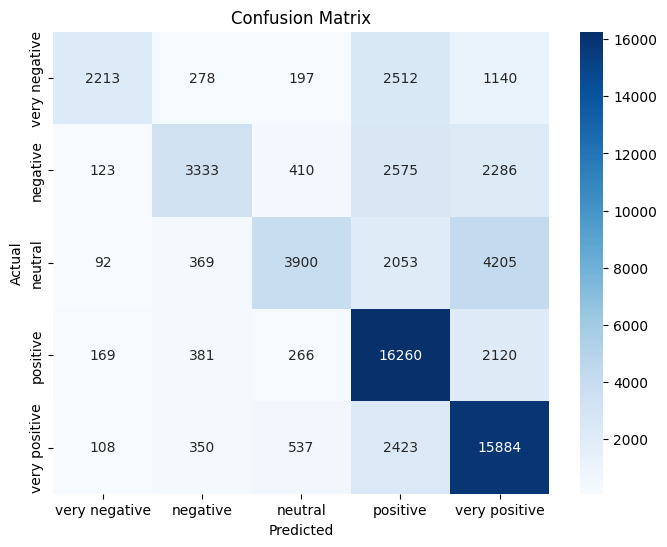

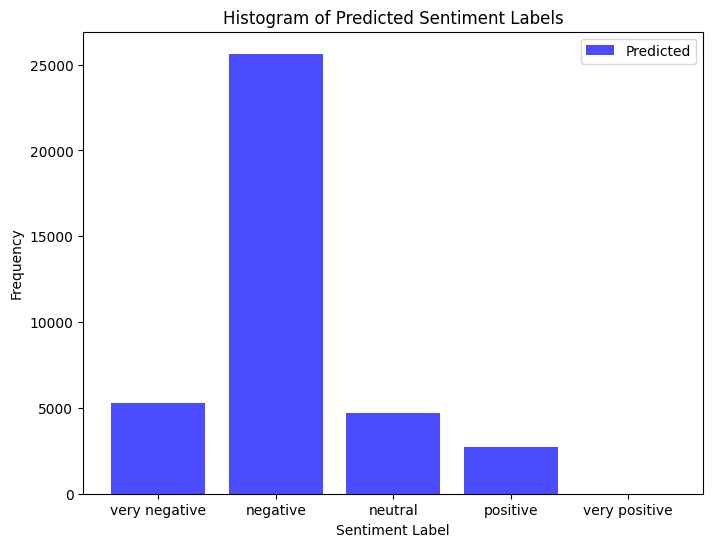

In [18]:
# import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Import numpy

# Load the data
data = pd.read_csv("C:/WPy64-31110/notebooks/docs/cleaned_data.csv")

# Map the satisfaction rates to sentiment labels
sentiment_map = {
    1: 'very negative',
    2: 'negative',
    3: 'neutral',
    4: 'positive',
    5: 'very positive'
}
data['Sentiment'] = data['Satisfaction'].map(sentiment_map)

# Remove rows with missing values
data = data.dropna(subset=['Reviews', 'Sentiment'])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['Reviews'], data['Sentiment'], test_size=0.2, random_state=42)

# Convert text data to Bag of Words vectors
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_bow, y_train)

# Make predictions
y_pred = clf.predict(X_test_bow)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sentiment_map.values(), yticklabels=sentiment_map.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Plot histogram for predicted sentiment labels
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=np.arange(0.5, 6.5, 1), rwidth=0.8, alpha=0.7, color='blue', label='Predicted')
plt.xticks(range(1, 6), sentiment_map.values())
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Sentiment Labels')
plt.legend()

plt.show()


# FRIST APPROACH USING Machine learning  LogisticRegression

C:\WPy64-31110\python-3.11.1.amd64\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8977019552855029
Confusion Matrix:
 [[16813  3084    47   174     2]
 [ 1566 37641   337     8    21]
 [    0   861  2048     0    12]
 [  394     1     1   984     0]
 [    0     9    49     0   133]]
Classification Report:
                precision    recall  f1-score   support

     negative       0.90      0.84      0.86     20120
      neutral       0.90      0.95      0.93     39573
     positive       0.83      0.70      0.76      2921
very negative       0.84      0.71      0.77      1380
very positive       0.79      0.70      0.74       191

     accuracy                           0.90     64185
    macro avg       0.85      0.78      0.81     64185
 weighted avg       0.90      0.90      0.90     64185



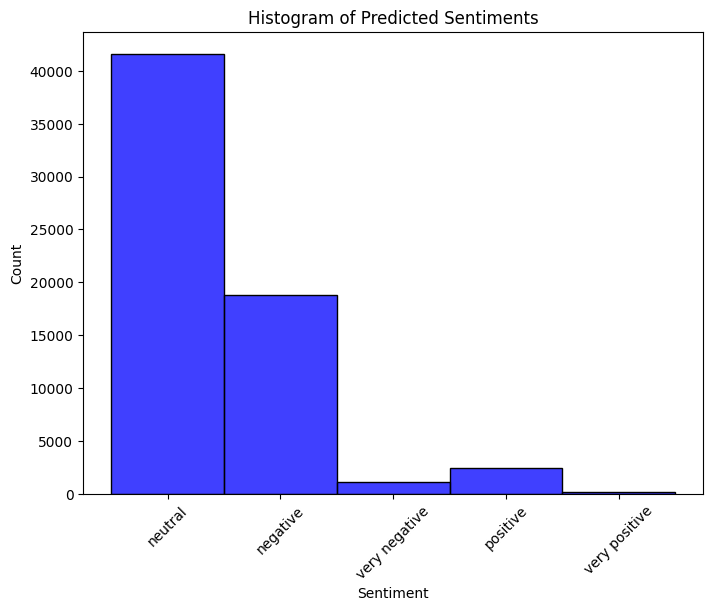

In [14]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Load the CSV data into a DataFrame
data = pd.read_csv("C:/WPy64-31110/notebooks/docs/cleaned_data.csv")

def preprocess_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = text.lower()  # Convert to lowercase
    return text

data['Reviews'] = data['Reviews'].apply(preprocess_text)

def get_sentiment(text):
    if isinstance(text, str):
        analysis = TextBlob(text)
        sentiment_score = analysis.sentiment.polarity
        return sentiment_score
    else:
        return 0.0  # Return a neutral sentiment score for non-string inputs

data['SentimentScore'] = data['Reviews'].apply(get_sentiment)

# Create a mapping of sentiment scores to sentiment labels
sentiment_map = {
    1: 'very negative',
    2: 'negative',
    3: 'neutral',
    4: 'positive',
    5: 'very positive'
}

# Apply the sentiment mapping
data['PredictedSentiment'] = data['SentimentScore'].apply(lambda score: sentiment_map.get(int(score // 0.5) + 3, 'neutral'))

# Drop rows with missing values in the 'Reviews' column
data.dropna(subset=['Reviews'], inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Reviews'], data['PredictedSentiment'], test_size=0.2, random_state=42)

# Create a CountVectorizer to convert text to numeric form
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train.fillna(''))
X_test_vectorized = vectorizer.transform(X_test.fillna(''))

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

# Predict on the test data
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)
# Plot a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", xticklabels=sentiment_map.values(), yticklabels=sentiment_map.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Plot a histogram of predicted sentiments
plt.figure(figsize=(8, 6))
sns.histplot(y_pred, bins=5, kde=False, color='blue')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Histogram of Predicted Sentiments')
plt.xticks(rotation=45)
plt.show()


In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv("C:/Users/Computing/Downloads/webmd.csv")

# Clean up the 'Reviews' column by removing leading and trailing whitespace
data['Reviews'] = data['Reviews'].str.strip()

# Drop rows with empty 'Reviews' column
data = data[data['Reviews'] != '']

# Save the cleaned dataset to a new CSV file
cleaned_path = 'cleaned_data.csv'
data.to_csv(cleaned_path, index=False)

print("Empty spaces removed and dataset cleaned. Cleaned data saved to:", cleaned_path)



Empty spaces removed and dataset cleaned. Cleaned data saved to: cleaned_data.csv


In [9]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Load the dataset
data = pd.read_csv("C:/Users/Computing/Downloads/cleaned_data.csv")

# Map the satisfaction rates to sentiment labels
sentiment_map = {
    1: 'very negative',
    2: 'negative',
    3: 'neutral',
    4: 'positive',
    5: 'very positive'
}
data['Sentiment'] = data['Satisfaction'].map(sentiment_map)

# Remove rows with missing values
data = data.dropna(subset=['Reviews', 'Sentiment'])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['Reviews'], data['Sentiment'], test_size=0.2, random_state=42)

# Convert text data to Bag of Words vectors
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_bow, y_train)

# Make predictions
y_pred_rf = clf.predict(X_test_bow)

# Calculate accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Ground Truth Accuracy: {accuracy_rf:.2f}')

# Generate classification report for Random Forest
classification_rep_rf = classification_report(y_test, y_pred_rf)
print(classification_rep_rf)

# Generate confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf / conf_matrix_rf.sum(axis=1, keepdims=True), annot=True, fmt=".2f", cmap="Blues", xticklabels=sentiment_map.values(), yticklabels=sentiment_map.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Ground Truth Confusion Matrix')
plt.show()



# Load the dataset for the second approach (Logistic Regression)
data_lr = pd.read_csv("C:/Users/Computing/Downloads/cleaned_data.csv")

def preprocess_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = text.lower()  # Convert to lowercase
    return text

data_lr['Reviews'] = data['Reviews'].apply(preprocess_text)

def get_sentiment(text):
    if isinstance(text, str):
        analysis = TextBlob(text)
        sentiment_score = analysis.sentiment.polarity
        return sentiment_score
    else:
        return 0.0  # Return a neutral sentiment score for non-string inputs

data_lr['SentimentScore'] = data['Reviews'].apply(get_sentiment)

# Create a mapping of sentiment scores to sentiment labels
sentiment_map = {
    1: 'very negative',
    2: 'negative',
    3: 'neutral',
    4: 'positive',
    5: 'very positive'
}

# Calculate sentiment scores and map to labels
data_lr['SentimentScore'] = data_lr['Reviews'].apply(get_sentiment)
data_lr['PredictedSentiment'] = data_lr['SentimentScore'].apply(lambda score: sentiment_map.get(int(score // 0.5) + 3, 'neutral'))

# Drop rows with missing values in the 'Reviews' column
data_lr.dropna(subset=['Reviews'], inplace=True)

# Split the data for Logistic Regression
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(data_lr['Reviews'], data_lr['PredictedSentiment'], test_size=0.2, random_state=42)

# Create a CountVectorizer to convert text to numeric form for Logistic Regression
vectorizer_lr = CountVectorizer()
X_train_vectorized_lr = vectorizer_lr.fit_transform(X_train_lr.fillna(''))
X_test_vectorized_lr = vectorizer_lr.transform(X_test_lr.fillna(''))

# Train a logistic regression model
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_vectorized_lr, y_train_lr)

# Predict on the test data
y_pred_lr = model_lr.predict(X_test_vectorized_lr)

# Calculate accuracy score for Logistic Regression
accuracy_lr = accuracy_score(y_test_lr, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr:.2f}')

# Generate classification report for Logistic Regression
classification_rep_lr = classification_report(y_test_lr, y_pred_lr)
print(classification_rep_lr)

# Generate confusion matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test_lr, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr / conf_matrix_lr.sum(axis=1, keepdims=True), annot=True, fmt=".2f", cmap="Blues", xticklabels=sentiment_map.values(), yticklabels=sentiment_map.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression -Confusion Matrix')
plt.show()

# Plot histograms for both approaches
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(y_pred_rf, bins=np.arange(0.5, 6.5, 1), rwidth=0.8, alpha=0.7, color='blue', label='Random Forest Predictions')
plt.xticks(range(1, 6), sentiment_map.values())
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Sentiment Labels (Ground Truth)')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(y_pred_lr, bins=np.arange(0.5, 6.5, 1), rwidth=0.8, alpha=0.7, color='orange', label='Logistic Regression Predictions')
plt.xticks(range(1, 6), sentiment_map.values())
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Sentiment Labels (Logistic Regression)')
plt.legend()

plt.tight_layout()
plt.show()



Ground Truth Accuracy: 0.65
               precision    recall  f1-score   support

     negative       0.82      0.35      0.49      6340
      neutral       0.71      0.38      0.50      8727
     positive       0.73      0.37      0.49     10619
very negative       0.63      0.85      0.72     19196
very positive       0.62      0.82      0.71     19302

     accuracy                           0.65     64184
    macro avg       0.70      0.55      0.58     64184
 weighted avg       0.67      0.65      0.63     64184



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.90
               precision    recall  f1-score   support

     negative       0.89      0.84      0.86     19993
      neutral       0.90      0.95      0.93     39622
     positive       0.83      0.69      0.75      3033
very negative       0.86      0.73      0.79      1336
very positive       0.78      0.65      0.71       200

     accuracy                           0.90     64184
    macro avg       0.85      0.77      0.81     64184
 weighted avg       0.90      0.90      0.89     64184



# Using  LinearSVC for Machine learning 

Accuracy: 0.8516787411388954
Confusion Matrix:
 [[15496  4521    32    69     2]
 [ 2140 37266   139    11    17]
 [    2  1688  1228     0     3]
 [  780    25     0   575     0]
 [    0    78    13     0   100]]
Classification Report:
                precision    recall  f1-score   support

     negative       0.84      0.77      0.80     20120
      neutral       0.86      0.94      0.90     39573
     positive       0.87      0.42      0.57      2921
very negative       0.88      0.42      0.57      1380
very positive       0.82      0.52      0.64       191

     accuracy                           0.85     64185
    macro avg       0.85      0.61      0.69     64185
 weighted avg       0.85      0.85      0.84     64185



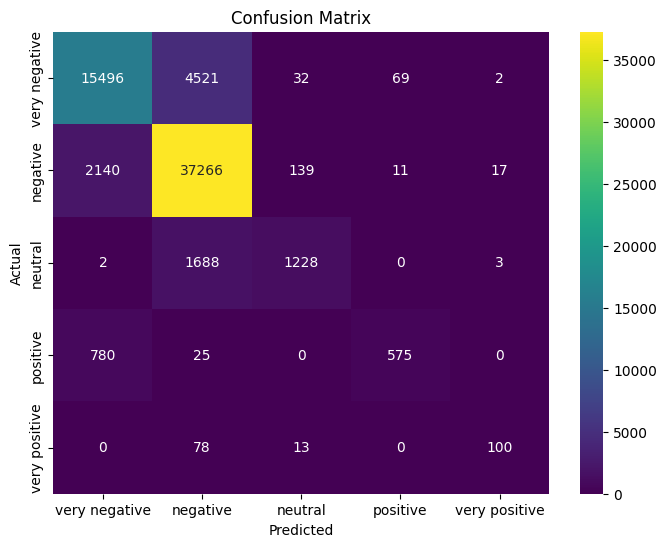

In [1]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Load the CSV data into a DataFrame
data = pd.read_csv("C:/WPy64-31110/notebooks/docs/cleaned_data.csv")

def preprocess_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = text.lower()  # Convert to lowercase
    return text

data['Reviews'] = data['Reviews'].apply(preprocess_text)

def get_sentiment(text):
    if isinstance(text, str):
        analysis = TextBlob(text)
        sentiment_score = analysis.sentiment.polarity
        return sentiment_score
    else:
        return 0.0  # Return a neutral sentiment score for non-string inputs

data['SentimentScore'] = data['Reviews'].apply(get_sentiment)

# Create a mapping of sentiment scores to sentiment labels
sentiment_map = {
    1: 'very negative',
    2: 'negative',
    3: 'neutral',
    4: 'positive',
    5: 'very positive'
}

# Apply the sentiment mapping
data['PredictedSentiment'] = data['SentimentScore'].apply(lambda score: sentiment_map.get(int(score // 0.5) + 3, 'neutral'))

# Drop rows with missing values in the 'Reviews' column
data.dropna(subset=['Reviews'], inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Reviews'], data['PredictedSentiment'], test_size=0.2, random_state=42)

# Create a TfidfVectorizer to convert text to numeric form
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train.fillna(''))
X_test_vectorized = vectorizer.transform(X_test.fillna(''))

# Train a linear SVM model
model = LinearSVC(max_iter=1000)
model.fit(X_train_vectorized, y_train)

# Predict on the test data
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# Plot a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", xticklabels=sentiment_map.values(), yticklabels=sentiment_map.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot a histogram of predicted sentiments
plt.figure(figsize=(8, 6))
sns.histplot(y_pred, bins=5, kde=False, color='blue')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Histogram of Predicted Sentiments')
plt.xticks(rotation=45)
plt.show()


Ground Truth Accuracy: 0.65
               precision    recall  f1-score   support

     negative       0.81      0.35      0.49      6340
      neutral       0.71      0.38      0.50      8727
     positive       0.73      0.37      0.49     10619
very negative       0.63      0.85      0.72     19196
very positive       0.62      0.82      0.71     19302

     accuracy                           0.65     64184
    macro avg       0.70      0.55      0.58     64184
 weighted avg       0.67      0.65      0.62     64184



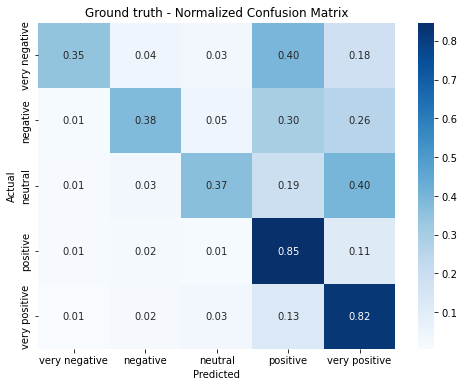

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.90
               precision    recall  f1-score   support

very negative       0.90      0.84      0.86     20119
     negative       0.90      0.95      0.93     39574
      neutral       0.83      0.70      0.76      2921
     positive       0.84      0.71      0.77      1380
very positive       0.80      0.72      0.75       191

     accuracy                           0.90     64185
    macro avg       0.85      0.78      0.82     64185
 weighted avg       0.90      0.90      0.90     64185



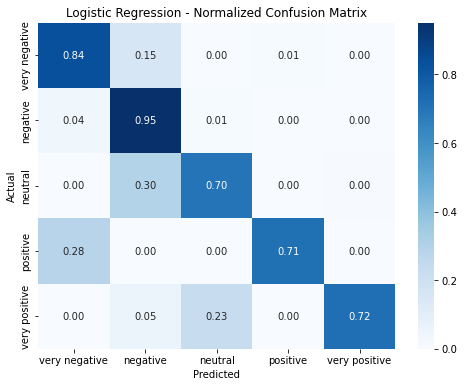

SVM Accuracy: 0.85
SVM Classification Report:
                precision    recall  f1-score   support

very negative       0.84      0.77      0.80     20129
     negative       0.85      0.94      0.89     39494
      neutral       0.87      0.38      0.53      3065
     positive       0.87      0.42      0.56      1301
very positive       0.80      0.55      0.65       203

     accuracy                           0.85     64192
    macro avg       0.85      0.61      0.69     64192
 weighted avg       0.85      0.85      0.84     64192



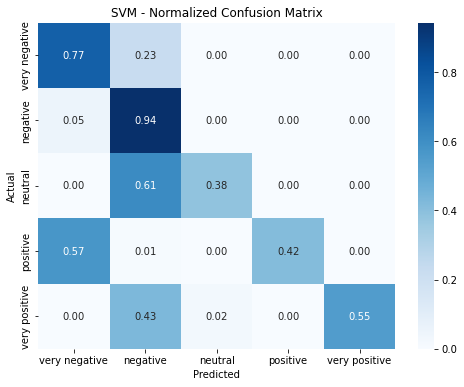

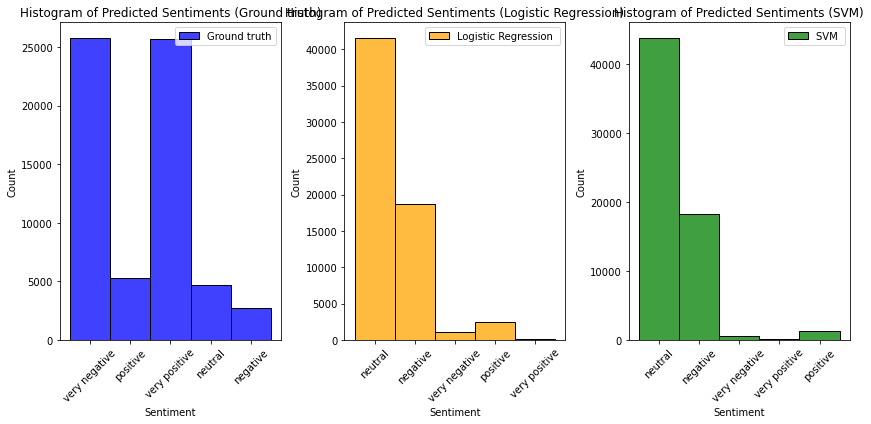

In [37]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Load the dataset
data = pd.read_csv("C:/Users/Computing/Downloads/cleaned_data.csv")

# Map the satisfaction rates to sentiment labels
sentiment_map = {
    1: 'very negative',
    2: 'negative',
    3: 'neutral',
    4: 'positive',
    5: 'very positive'
}
data['Sentiment'] = data['Satisfaction'].map(sentiment_map)

# Remove rows with missing values
data = data.dropna(subset=['Reviews', 'Sentiment'])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['Reviews'], data['Sentiment'], test_size=0.2, random_state=42)

# Convert text data to Bag of Words vectors
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_bow, y_train)

# Make predictions
y_pred_rf = clf.predict(X_test_bow)

# Calculate accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Ground Truth Accuracy: {accuracy_rf:.2f}')

# Generate classification report for Random Forest
classification_rep_rf = classification_report(y_test, y_pred_rf)
print(classification_rep_rf)

# Generate confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt=".2f", cmap="Blues", xticklabels=sentiment_map.values(), yticklabels=sentiment_map.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Ground truth - Normalized Confusion Matrix')
plt.show()

# Load the dataset for the second approach (Logistic Regression)
data_lr = pd.read_csv("C:/Users/Computing/Downloads/cleaned_data.csv")

def preprocess_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = text.lower()  # Convert to lowercase
    return text

data_lr['Reviews'] = data_lr['Reviews'].apply(preprocess_text)

def get_sentiment(text):
    if isinstance(text, str):
        analysis = TextBlob(text)
        sentiment_score = analysis.sentiment.polarity
        return sentiment_score
    else:
        return 0.0  # Return a neutral sentiment score for non-string inputs

data_lr['SentimentScore'] = data_lr['Reviews'].apply(get_sentiment)

# Calculate sentiment scores and map to labels
data_lr['SentimentScore'] = data_lr['Reviews'].apply(get_sentiment)
data_lr['PredictedSentiment'] = data_lr['SentimentScore'].apply(lambda score: sentiment_map.get(int(score // 0.5) + 3, 'neutral'))

# Drop rows with missing values in the 'Reviews' column
data_lr.dropna(subset=['Reviews'], inplace=True)

# Split the data for Logistic Regression
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(data_lr['Reviews'], data_lr['PredictedSentiment'], test_size=0.2, random_state=42)

# Create a CountVectorizer to convert text to numeric form for Logistic Regression
vectorizer_lr = CountVectorizer()
X_train_vectorized_lr = vectorizer_lr.fit_transform(X_train_lr.fillna(''))
X_test_vectorized_lr = vectorizer_lr.transform(X_test_lr.fillna(''))

# Train a logistic regression model
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_vectorized_lr, y_train_lr)

# Predict on the test data
y_pred_lr = model_lr.predict(X_test_vectorized_lr)

# Calculate accuracy score for Logistic Regression
accuracy_lr = accuracy_score(y_test_lr, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr:.2f}')

# Generate classification report for Logistic Regression
classification_rep_lr = classification_report(y_test_lr, y_pred_lr, target_names=sentiment_map.values())
print(classification_rep_lr)

# Generate confusion matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test_lr, y_pred_lr, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt=".2f", cmap="Blues", xticklabels=sentiment_map.values(), yticklabels=sentiment_map.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Normalized Confusion Matrix')
plt.show()

# Load the dataset for the third approach (SVM)
data_svm = pd.read_csv("C:/Users/Computing/Downloads/cleaned_data.csv")

def preprocess_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = text.lower()  # Convert to lowercase
    return text

data_svm ['Reviews'] = data['Reviews'].apply(preprocess_text)

def get_sentiment(text):
    if isinstance(text, str):
        analysis = TextBlob(text)
        sentiment_score = analysis.sentiment.polarity
        return sentiment_score
    else:
        return 0.0  # Return a neutral sentiment score for non-string inputs

# Create a mapping of sentiment scores to sentiment labels
sentiment_map = {
    1: 'very negative',
    2: 'negative',
    3: 'neutral',
    4: 'positive',
    5: 'very positive'
}

data_svm['SentimentScore'] = data_svm['Reviews'].apply(get_sentiment)
data_svm['PredictedSentiment'] = data_svm['SentimentScore'].apply(lambda score: sentiment_map.get(int(score // 0.5) + 3, 'neutral'))

# Split the data for the third approach (SVM)
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(data_svm['Reviews'], data_svm['PredictedSentiment'], test_size=0.2, random_state=42)
# Create a TfidfVectorizer to convert text to numeric form for SVM
vectorizer_svm = TfidfVectorizer()
X_train_vectorized_svm = vectorizer_svm.fit_transform(X_train_svm.fillna(''))
X_test_vectorized_svm = vectorizer_svm.transform(X_test_svm.fillna(''))

# Train a linear SVM model
model_svm = LinearSVC(max_iter=1000)
model_svm.fit(X_train_vectorized_svm, y_train_svm)

# Predict on the test data for SVM
y_pred_svm = model_svm.predict(X_test_vectorized_svm)

# Calculate accuracy score for SVM
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.2f}')

# Generate classification report for SVM
classification_rep_svm = classification_report(y_test_svm, y_pred_svm, target_names=sentiment_map.values())
print("SVM Classification Report:\n", classification_rep_svm)

# Generate confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test_svm, y_pred_svm, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt=".2f", cmap="Blues", xticklabels=sentiment_map.values(), yticklabels=sentiment_map.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM - Normalized Confusion Matrix')
plt.show()

# Plot comparative histograms of predicted sentiments
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(y_pred_rf, bins=5, kde=False, color='blue', label='Ground truth')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Histogram of Predicted Sentiments (Ground truth)')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(1, 3, 2)
sns.histplot(y_pred_lr, bins=5, kde=False, color='orange', label='Logistic Regression ')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Histogram of Predicted Sentiments (Logistic Regression)')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(1, 3, 3)
sns.histplot(y_pred_svm, bins=5, kde=False, color='green', label='SVM ')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Histogram of Predicted Sentiments (SVM)')
plt.xticks(rotation=45)
plt.legend()


plt.tight_layout()
plt.show()


# COMPARATIVE Study of Ground truth Vs the machine learning LR AND SVM

In [38]:
# Predict on the test data
y_pred_lr = model_lr.predict(X_test_vectorized_lr)

# Predict on the test data for SVM
y_pred_svm = model_svm.predict(X_test_vectorized_svm)

# Plot comparative histograms of predicted sentiments
plt.figure(figsize=(16, 6))

# Histogram for Ground Truth (Random Forest) predictions
plt.subplot(131)  # Create the first subplot
plt.hist(y_pred_rf, bins=np.arange(0.5, 6.5, 1), rwidth=0.8, alpha=0.7, color='blue', label='Ground Truth')
plt.xticks(range(1, 6), sentiment_map.values())
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Sentiment Labels (Ground Truth)')
plt.legend()

# Histogram for Logistic Regression predictions
plt.subplot(132)  # Create the second subplot
plt.hist(y_pred_lr, bins=np.arange(0.5, 6.5, 1), rwidth=0.8, alpha=0.7, color='orange', label='Logistic Regression')
plt.xticks(range(1, 6), sentiment_map.values())
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Sentiment Labels (Logistic Regression)')
plt.legend()

# Histogram for SVM predictions
plt.subplot(133)  # Create the third subplot
plt.hist(y_pred_svm, bins=np.arange(0.5, 6.5, 1), rwidth=0.8, alpha=0.7, color='green', label='SVM')
plt.xticks(range(1, 6), sentiment_map.values())
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Sentiment Labels (SVM)')
plt.legend()

plt.tight_layout()
plt.show()


# Using simple  based rule approach 

Accuracy: 0.17053002949202062
Classification Report:
                precision    recall  f1-score   support

     negative       0.09      0.07      0.08      7092
      neutral       0.15      0.82      0.25     10454
     positive       0.21      0.11      0.15     12518
very negative       0.53      0.08      0.13     20164
very positive       0.72      0.02      0.03     22334

     accuracy                           0.17     72562
    macro avg       0.34      0.22      0.13     72562
 weighted avg       0.44      0.17      0.12     72562



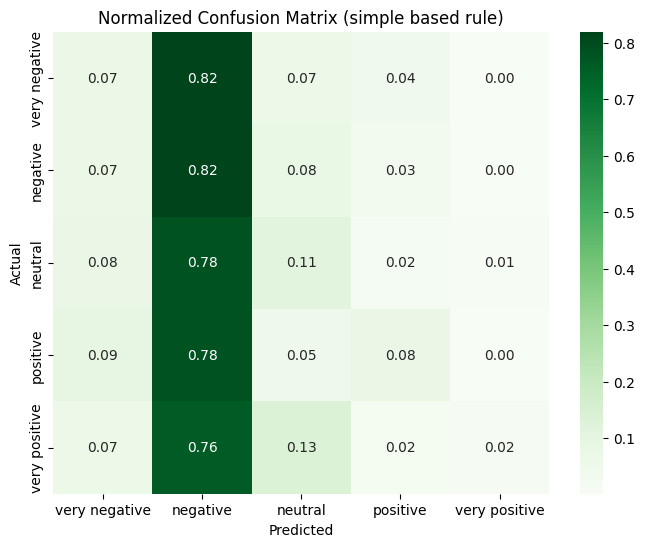

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("C:/WPy64-31110/notebooks/docs/webmd.csv")

# Define sentiment rules
sentiment_rules = {
    'very negative': ['very bad', 'awful', 'terrible'],
    'negative': ['bad', 'poor', 'negative'],
    'neutral': ['neutral', 'average', 'okay', 'ok'],
    'positive': ['good', 'great', 'positive'],
    'very positive': ['excellent', 'fantastic', 'amazing']
}

# Function to classify sentiment based on rules
def classify_sentiment(review):
    if isinstance(review, str):  # Check if the review is a string
        for sentiment, keywords in sentiment_rules.items():
            if any(keyword in review.lower() for keyword in keywords):
                return sentiment
    return 'neutral'  # Default sentiment if it's not a string or no rules match

# Split data into train and test sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Apply sentiment classification to the 'Reviews' column for both train and test sets
train['Predicted_Sentiment'] = train['Reviews'].apply(classify_sentiment)
test['Predicted_Sentiment'] = test['Reviews'].apply(classify_sentiment)

# Evaluate the model on the test set
true_sentiments_test = test['Satisfaction'].apply(lambda x: {
    1: 'very negative',
    2: 'negative',
    3: 'neutral',
    4: 'positive',
    5: 'very positive'
}.get(x, 'neutral'))  # Use .get() to handle unknown values with a default

accuracy = accuracy_score(true_sentiments_test, test['Predicted_Sentiment'])
classification_rep = classification_report(true_sentiments_test, test['Predicted_Sentiment'])
confusion_mat = confusion_matrix(true_sentiments_test, test['Predicted_Sentiment'])

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

# Compute the normalized confusion matrix
normalized_confusion_mat = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]

# Visualize the normalized confusion matrix using Seaborn with a green color map
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_confusion_mat, annot=True, fmt='.2f', cmap='Greens', xticklabels=sentiment_rules.keys(), yticklabels=sentiment_rules.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (simple based rule)')
plt.show()



# COMPARATIVE Study of Ground truth vs the simple based rule

In [49]:

plt.figure(figsize=(15, 5))

# Normalize confusion matrix
normalized_conf_matrix = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

# Create the first subplot
plt.subplot(131)
plt.hist(y_test, bins=np.arange(0.5, 6.5, 1), rwidth=0.8, alpha=0.7, color='blue', label='Ground Truth')
plt.xticks(range(1, 6), sentiment_rules.keys())
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.title('Histogram of Ground Truth Sentiment Labels')
plt.legend()


# Create the third subplot
plt.subplot(132)
sns.histplot(y_test, bins=5, kde=False, color='red')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Histogram of Predicted Sentiments')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



# Using Deep learning  CNN 


In [1]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Input

# Load the dataset
data = pd.read_csv("C:/Users/Computing/Downloads/webmd.csv") 

# Clean up the 'Reviews' column by removing leading and trailing whitespace
data['Reviews'] = data['Reviews'].str.strip()

# Drop rows with empty 'Reviews' column
data = data[data['Reviews'] != '']

# Save the cleaned dataset to a new CSV file
cleaned_path = 'cleaned_data.csv'
data.to_csv(cleaned_path, index=False)
print("Empty spaces removed and dataset cleaned. Cleaned data saved to:", cleaned_path)

# Load the cleaned CSV data into a DataFrame
data = pd.read_csv(cleaned_path)

# Define functions for preprocessing and sentiment analysis
def preprocess_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = text.lower()  # Convert to lowercase
    return text

def get_sentiment(text):
    if isinstance(text, str):
        analysis = TextBlob(text)
        sentiment_score = analysis.sentiment.polarity
        return sentiment_score
    else:
        return 0.0  # Return a neutral sentiment score for non-string inputs

# Apply preprocessing and sentiment analysis
data['Reviews'] = data['Reviews'].apply(preprocess_text)
data['SentimentScore'] = data['Reviews'].apply(get_sentiment)

# Create a mapping of sentiment scores to sentiment labels
sentiment_map = {
    1: 'very negative',
    2: 'negative',
    3: 'neutral',
    4: 'positive',
    5: 'very positive'
}

# Apply the sentiment mapping
data['PredictedSentiment'] = data['SentimentScore'].apply(lambda score: sentiment_map.get(int(score // 0.5) + 3, 'neutral'))

# Drop rows with missing values in the 'Reviews' column
data.dropna(subset=['Reviews'], inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Reviews'], data['PredictedSentiment'], test_size=0.2, random_state=42)

# Tokenize and pad the text data
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
max_seq_length = max(len(sequence) for sequence in X_train_sequences)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_seq_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_seq_length, padding='post')

# Encode sentiment labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Build a CNN model using Keras Functional API
input_layer = Input(shape=(max_seq_length,))
embedding_layer = Embedding(input_dim=max_words, output_dim=100, input_length=max_seq_length)(input_layer)
conv_layer = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer)
pooling_layer = GlobalMaxPooling1D()(conv_layer)
dense_layer = Dense(64, activation='relu')(pooling_layer)
dropout_layer = Dropout(0.5)(dense_layer)
output_layer = Dense(len(sentiment_map), activation='softmax')(dropout_layer)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the CNN model
model.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test_encoded)
y_pred_encoded = model.predict(X_test_padded).argmax(axis=-1)
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)
classification_rep = classification_report(y_test_encoded, y_pred_encoded, target_names=label_encoder.classes_)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# Plot a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Calculate predicted sentiment labels using the trained model
y_pred_encoded = model.predict(X_test_padded).argmax(axis=-1)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Plot a histogram of predicted sentiments
plt.figure(figsize=(8, 6))
sns.histplot(y_pred, bins=5, kde=False, color='blue')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Histogram of Predicted Sentiments')
plt.xticks(rotation=45)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Empty spaces removed and dataset cleaned. Cleaned data saved to: cleaned_data.csv
Epoch 1/5
3611/3611 [==============================] - 310s 86ms/step - loss: 0.3382 - accuracy: 0.8674 - val_loss: 0.1768 - val_accuracy: 0.9281
Epoch 2/5
3611/3611 [==============================] - 336s 93ms/step - loss: 0.1623 - accuracy: 0.9400 - val_loss: 0.1571 - val_accuracy: 0.9394
Epoch 3/5
3611/3611 [==============================] - 312s 86ms/step - loss: 0.1127 - accuracy: 0.9597 - val_loss: 0.1511 - val_accuracy: 0.9457
Epoch 4/5
3611/3611 [==============================] - 312s 87ms/step - loss: 0.0799 - accuracy: 0.9718 - val_loss: 0.1743 - val_accuracy: 0.9435
Epoch 5/5
2006/2006 [==============================] - 15s 7ms/step
Accuracy: 0.9478226900100708
Confusion Matrix:
 [[18355  1676     0    89     0]
 [  998 38481    87     5     2]
 [    0   300  2621     0     0]
 [  168     2     0  1210     0]
 [    0     2    20     0   169]]
Classification Report:
                precision    

2006/2006 [==============================] - 14s 7ms/step


2006/2006 [==============================] - 13s 7ms/step
CNN Model Accuracy: 0.9319155812263489
CNN Model Confusion Matrix:
 [[17946  2060     9   103     1]
 [ 1411 37876   276     6     5]
 [    2   190  2728     0     1]
 [  267     2     0  1111     0]
 [    0     1    36     0   154]]
CNN Model Classification Report:
                precision    recall  f1-score   support

     negative       0.91      0.89      0.90     20119
      neutral       0.94      0.96      0.95     39574
     positive       0.89      0.93      0.91      2921
very negative       0.91      0.81      0.85      1380
very positive       0.96      0.81      0.88       191

     accuracy                           0.93     64185
    macro avg       0.92      0.88      0.90     64185
 weighted avg       0.93      0.93      0.93     64185



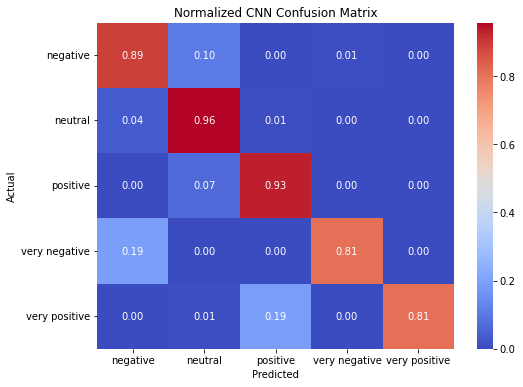

Ground truth  Model Accuracy: 0.65
               precision    recall  f1-score   support

     negative       0.81      0.35      0.49      6340
      neutral       0.71      0.38      0.50      8727
     positive       0.73      0.37      0.49     10619
very negative       0.63      0.85      0.72     19196
very positive       0.62      0.82      0.71     19302

     accuracy                           0.65     64184
    macro avg       0.70      0.55      0.58     64184
 weighted avg       0.67      0.65      0.62     64184



In [2]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Input
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Load the dataset
data = pd.read_csv("C:/Users/Computing/Downloads/cleaned_data.csv")

# Define functions for preprocessing and sentiment analysis
def preprocess_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = text.lower()  # Convert to lowercase
    return text

def get_sentiment(text):
    if isinstance(text, str):
        analysis = TextBlob(text)
        sentiment_score = analysis.sentiment.polarity
        return sentiment_score
    else:
        return 0.0  # Return a neutral sentiment score for non-string inputs

# Apply preprocessing and sentiment analysis
data['Reviews'] = data['Reviews'].apply(preprocess_text)
data['SentimentScore'] = data['Reviews'].apply(get_sentiment)

# Create a mapping of sentiment scores to sentiment labels
sentiment_map = {
    1: 'very negative',
    2: 'negative',
    3: 'neutral',
    4: 'positive',
    5: 'very positive'
}

# Apply the sentiment mapping
data['PredictedSentiment'] = data['SentimentScore'].apply(lambda score: sentiment_map.get(int(score // 0.5) + 3, 'neutral'))

# Drop rows with missing values in the 'Reviews' column
data.dropna(subset=['Reviews'], inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Reviews'], data['PredictedSentiment'], test_size=0.2, random_state=42)

# Tokenize and pad the text data
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
max_seq_length = max(len(sequence) for sequence in X_train_sequences)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_seq_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_seq_length, padding='post')

# Encode sentiment labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Build a CNN model using Keras Functional API
input_layer = Input(shape=(max_seq_length,))
embedding_layer = Embedding(input_dim=max_words, output_dim=100, input_length=max_seq_length)(input_layer)
conv_layer = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer)
pooling_layer = GlobalMaxPooling1D()(conv_layer)
dense_layer = Dense(64, activation='relu')(pooling_layer)
dropout_layer = Dropout(0.5)(dense_layer)
output_layer = Dense(len(sentiment_map), activation='softmax')(dropout_layer)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the CNN model
model.fit(X_train_padded, y_train_encoded, epochs=1, batch_size=64, validation_split=0.1)

# Evaluate the CNN model
loss, accuracy = model.evaluate(X_test_padded, y_test_encoded)
y_pred_encoded_cnn = model.predict(X_test_padded).argmax(axis=-1)
conf_matrix_cnn = confusion_matrix(y_test_encoded, y_pred_encoded_cnn)
classification_rep_cnn = classification_report(y_test_encoded, y_pred_encoded_cnn, target_names=label_encoder.classes_)

print("CNN Model Accuracy:", accuracy)
print("CNN Model Confusion Matrix:\n", conf_matrix_cnn)
print("CNN Model Classification Report:\n", classification_rep_cnn)

# Plot a heatmap of the normalized CNN confusion matrix
normalized_conf_matrix_cnn = conf_matrix_cnn / conf_matrix_cnn.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_conf_matrix_cnn, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized CNN Confusion Matrix')
plt.show()

# Calculate predicted sentiment labels using the trained CNN model
y_pred_cnn = label_encoder.inverse_transform(y_pred_encoded_cnn)

# ... (Random Forest code)

# Load the data for Random Forest
data_rf = pd.read_csv("C:/Users/Computing/Downloads/cleaned_data.csv")

# Map the satisfaction rates to sentiment labels
sentiment_map_rf = {
    1: 'very negative',
    2: 'negative',
    3: 'neutral',
    4: 'positive',
    5: 'very positive'
}
data_rf['Sentiment'] = data_rf['Satisfaction'].map(sentiment_map_rf)

# Remove rows with missing values
data_rf = data_rf.dropna(subset=['Reviews', 'Sentiment'])

# Split the data for Random Forest into train and test sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(data_rf['Reviews'], data_rf['Sentiment'], test_size=0.2, random_state=42)

# Convert text data to Bag of Words vectors for Random Forest
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_train_bow = vectorizer.fit_transform(X_train_rf)
X_test_bow = vectorizer.transform(X_test_rf)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_bow, y_train_rf)

# Make predictions using the Random Forest model
y_pred_rf = clf.predict(X_test_bow)

# Calculate accuracy score for Random Forest
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print(f'Ground truth  Model Accuracy: {accuracy_rf:.2f}')

# Generate classification report for Random Forest
classification_rep_rf = classification_report(y_test_rf, y_pred_rf)
print(classification_rep_rf)

# Generate confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=sentiment_map_rf.values(), yticklabels=sentiment_map_rf.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Ground truth Confusion Matrix')

# Plot histogram for predicted sentiment labels for Random Forest
plt.figure(figsize=(8, 6))
plt.hist(y_pred_rf, bins=np.arange(0.5, 6.5, 1), rwidth=0.8, alpha=0.7, color='blue', label='Ground truth ')
plt.xticks(range(1, 6), sentiment_map_rf.values())
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Sentiment Labels (Ground truth )')
plt.legend()

plt.show()

# Plot histograms of predicted sentiments for CNN and Random Forest together
plt.figure(figsize=(12, 6))

# Histogram for CNN predictions
sns.histplot(y_pred_cnn, bins=5, kde=False, color='blue', label='CNN', alpha=0.7)

# Histogram for Random Forest predictions
sns.histplot(y_pred_rf, bins=np.arange(0.5, 6.5, 1), kde=False, color='red', label='Ground truth ', alpha=0.7)

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Histogram of Predicted Sentiments (CNN vs. Ground truth )')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [16]:
# Plot histograms of predicted sentiments for CNN and Random Forest together
plt.figure(figsize=(12, 6))

# Histogram for CNN predictions
plt.subplot(121)  # Create a subplot with 1 row and 2 columns, select the first subplot
sns.histplot(y_pred_cnn, bins=5, kde=False, color='Red', label='CNN', alpha=0.7)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Histogram of Predicted Sentiments (CNN)')
plt.xticks(rotation=45)
plt.legend()
 #Histogram for Random Forest predictions
sns.histplot(y_pred_rf, bins=np.arange(0.5, 6.5, 1), kde=False, color='red', label='Ground truth ', alpha=0.7)

# Plot histogram for predicted sentiment labels
plt.subplot(122)  # Create the second subplot
plt.hist(y_pred_rf, bins=np.arange(0.5, 6.5, 1), rwidth=0.8, alpha=0.7, color='blue', label='Predicted')
plt.xticks(range(1, 6), sentiment_map.values())
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Sentiment Labels')
plt.legend()

plt.tight_layout()  # Adjust subplot layout to prevent overlapping
plt.show()




# DEEP LEARNING LSTM

In [ ]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Input
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import tensorflow as tf

# Check if GPU is available
if tf.test.gpu_device_name():
    print('GPU found')
else:
    print('No GPU found, training on CPU')

# Load the data for LSTM and CNN
data = pd.read_csv("C:/Users/Computing/Downloads/cleaned_data.csv")

# Define functions for preprocessing and sentiment analysis
def preprocess_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = text.lower()  # Convert to lowercase
    return text

def get_sentiment(text):
    if isinstance(text, str):
        analysis = TextBlob(text)
        sentiment_score = analysis.sentiment.polarity
        return sentiment_score
    else:
        return 0.0  # Return a neutral sentiment score for non-string inputs

# Apply preprocessing and sentiment analysis
data['Reviews'] = data['Reviews'].apply(preprocess_text)
data['SentimentScore'] = data['Reviews'].apply(get_sentiment)

# Create a mapping of sentiment scores to sentiment labels
sentiment_map = {
    1: 'very negative',
    2: 'negative',
    3: 'neutral',
    4: 'positive',
    5: 'very positive'
}

# Apply the sentiment mapping
data['PredictedSentiment'] = data['SentimentScore'].apply(lambda score: sentiment_map.get(int(score // 0.5) + 3, 'neutral'))

# Drop rows with missing values in the 'Reviews' column
data.dropna(subset=['Reviews'], inplace=True)

# Split the data into training and testing sets for LSTM and CNN
X_train, X_test, y_train, y_test = train_test_split(data['Reviews'], data['PredictedSentiment'], test_size=0.2, random_state=42)

# Tokenize and pad the text data for LSTM and CNN
max_words = 10000
max_seq_length = 100  # Reduce the maximum sequence length
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_seq_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_seq_length, padding='post')

# Encode sentiment labels for LSTM and CNN
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Build an LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_seq_length))
model_lstm.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(len(sentiment_map), activation='softmax'))

# Use mixed-precision training if supported by GPU
if tf.test.is_gpu_available():
    print("Using mixed-precision training")
    from tensorflow.keras.mixed_precision import experimental as mixed_precision
    policy = mixed_precision.Policy('mixed_float16')
    mixed_precision.set_policy(policy)

model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Implement gradient accumulation
batch_size = 64
accumulated_gradients = 4  # Accumulate gradients over 4 mini-batches

# Train the LSTM model with gradient accumulation
for epoch in range(5):  # Reduce the number of training epochs
    for i in range(0, len(X_train_padded), batch_size * accumulated_gradients):
        X_batch = X_train_padded[i:i + batch_size * accumulated_gradients]
        y_batch = y_train_encoded[i:i + batch_size * accumulated_gradients]
        model_lstm.train_on_batch(X_batch, y_batch)

# Evaluate the LSTM model
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test_padded, y_test_encoded, verbose=0)
y_pred_encoded_lstm = model_lstm.predict(X_test_padded).argmax(axis=-1)
conf_matrix_lstm = confusion_matrix(y_test_encoded, y_pred_encoded_lstm)
classification_rep_lstm = classification_report(y_test_encoded, y_pred_encoded_lstm, target_names=label_encoder.classes_)


Accuracy for LSTM: 0.9434759020805359


Classification Report for LSTM:
                precision    recall  f1-score   support

     negative       0.92      0.93      0.92     20119
      neutral       0.95      0.96      0.96     39574
     positive       0.98      0.87      0.92      2921
very negative       0.97      0.82      0.89      1380
very positive       0.96      0.94      0.95       191

     accuracy                           0.94     64185
    macro avg       0.96      0.90      0.93     64185
 weighted avg       0.94      0.94      0.94     64185



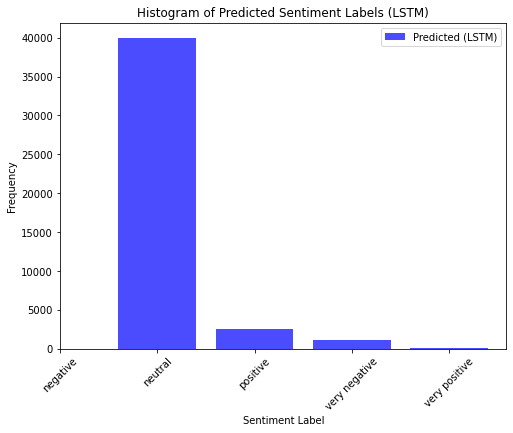

In [57]:
print("Accuracy for LSTM:", accuracy_lstm)
# Plot a heatmap of the normalized confusion matrix for LSTM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lstm_normalized, annot=True, fmt=".2f", cmap="Greens", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix for LSTM')
plt.show()

# Generate classification report for LSTM
classification_rep_lstm = classification_report(y_test_encoded, y_pred_encoded_lstm, target_names=label_encoder.classes_)
print("Classification Report for LSTM:\n", classification_rep_lstm)
# Plot a histogram of predicted sentiment labels for LSTM
plt.figure(figsize=(8, 6))
plt.hist(y_pred_encoded_lstm, bins=np.arange(0.5, len(sentiment_map) + 0.5, 1), rwidth=0.8, alpha=0.7, color='blue', label='Predicted (LSTM)')
plt.xticks(range(len(sentiment_map)), label_encoder.classes_, rotation=45)
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Sentiment Labels (LSTM)')
plt.legend()
plt.show()

# COMPARATIVE Study of Ground truth with CNN and Lstm

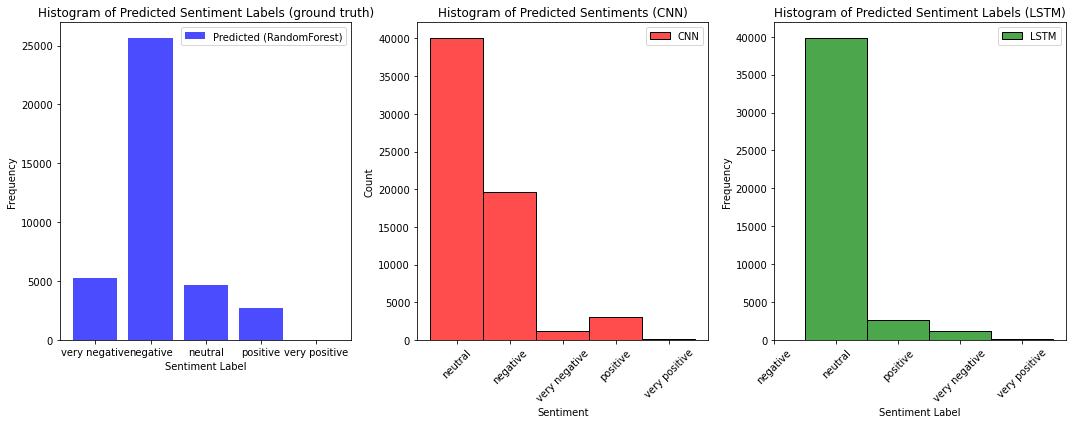

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(15, 6))



# Plot histogram for predicted sentiment labels with RandomForest
plt.subplot(131)  # Select the second subplot
plt.hist(y_pred_rf, bins=np.arange(0.5, 6.5, 1), rwidth=0.8, alpha=0.7, color='blue', label='Predicted (RandomForest)')
plt.xticks(range(1, 6), sentiment_map_rf.values())
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Sentiment Labels (ground truth)')
plt.legend()


# Histogram for CNN predictions
plt.subplot(132)  # Create a subplot with 1 row and 3 columns, select the first subplot
sns.histplot(y_pred_cnn, bins=5, kde=False, color='red', label='CNN', alpha=0.7)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Histogram of Predicted Sentiments (CNN)')
plt.xticks(rotation=45)
plt.legend()

# Histogram for LSTM predictions
plt.subplot(133)  # Select the third subplot
sns.histplot(y_pred_encoded_lstm, bins=np.arange(0.5, len(sentiment_map) + 0.5, 1), kde=False, color='green', label='LSTM', alpha=0.7)
plt.xticks(range(len(sentiment_map)), label_encoder.classes_, rotation=45)
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Sentiment Labels (LSTM)')
plt.legend()

plt.tight_layout()  # Adjust subplot layout to prevent overlapping
plt.show()



# Identifying the condition of the patient based on drug reviews

In [53]:
import pandas as pd
import re

# Read the CSV file
df = pd.read_csv("C:/WPy64-31110/notebooks/docs/webmd.csv")

# Define a dictionary of conditions and their associated keywords
condition_keywords ={
    "Cardiovascular Conditions": [
        "High Blood Pressure",
        "High Cholesterol",
        "Blood Clot in a Deep Vein",
        "Acute Blood Clot in a Blood Vessel Supplying the Lungs",
        "Slow Progression of Disease of the Arteries of the Heart",
        "Blood Clot Prevention Following Percutaneous Coronary Intervention",
        "Primary Prevention of Heart Attack",
        "Combined High Blood Cholesterol and Triglyceride Level",
        "Stroke Prevention",
        "Myocardial Reinfarction Prevention"
    ],
    "Respiratory and Allergy Conditions": [
        "Inflammation of the Nose due to an Allergy",
        "Chronic Trouble Sleeping",
        "Stuffy Nose",
        "Sneezing",
        "Allergic Conjunctivitis",
        "Other Allergic Conditions",
        "Other Respiratory Symptoms"
    ],
    "Women's Health and Reproductive Conditions": [
        "Painful Periods",
        "Disease of Ovaries with Cysts",
        "Birth Control",
        "Endometriosis",
        "Premenstrual Disorder with a State of Unhappiness",
        "Other Reproductive Conditions"
    ],
    "Mental Health and Neurological Conditions": [
        "Anxiety",
        "Delirium",
        "Mania associated with Bipolar Disorder, Adjunct Treatment",
        "Chronic Heart Failure",
        "Seizures",
        "Tension Headache",
        "Other Mental Health and Neurological Conditions"
    ],
    "Gastrointestinal Conditions": [
        "Nausea and Vomiting from Cancer Chemotherapy",
        "Nausea and Vomiting caused by Cancer Drugs"
    ],
    "Skin and Dermatological Conditions": [
        "Acne",
        "Hives",
        "Itching",
        "Other Skin and Dermatological Conditions"
    ],
    "Metabolic and Weight-Related Conditions": [
        "Weight Loss Management for Overweight Person with BMI 27 to 29 and Weight-Related Comorbidity",
        "Weight Loss Management for an Obese Person",
        "Other Metabolic Conditions"
    ],
    "Other Conditions": [
        "Other Conditions not falling into the above categories"
    ]
}


# Initialize a list to store identified conditions
identified_conditions = []

# Loop through each review to identify conditions
for review in df['Reviews']:
    if isinstance(review, str):  # Check if the review is a valid string
        identified_condition = None
        for condition, keywords in condition_keywords.items():
            for keyword in keywords:
                if re.search(r'\b' + re.escape(keyword) + r'\b', review, re.IGNORECASE):
                    identified_condition = condition
                    break  
            if identified_condition:
                break  
    else:
        identified_condition = None  # Set condition to None for non-string reviews
    identified_conditions.append(identified_condition)

# Add the identified conditions to the DataFrame
df['Identified_Condition'] = identified_conditions

# Display the DataFrame with identified conditions
print(df[['Condition', 'Identified_Condition']])
# Display the first 30 rows of the DataFrame with identified conditions
print(df[['Condition', 'Identified_Condition']].head(40))



            Condition Identified_Condition
0         Stuffy Nose                 None
1       Cold Symptoms                 None
2               Other                 None
3               Other                 None
4               Other                 None
...               ...                  ...
362801   Stop Smoking                 None
362802          Other                 None
362803   Stop Smoking                 None
362804   Stop Smoking                 None
362805   Stop Smoking                 None

[362806 rows x 2 columns]
                           Condition  \
0                        Stuffy Nose   
1                      Cold Symptoms   
2                              Other   
3                              Other   
4                              Other   
5                              Other   
6                      Birth Control   
7      Disease of Ovaries with Cysts   
8                               Acne   
9                        Stuffy Nose   
10               

In [13]:
import pandas as pd
import re

# Read the CSV file
df = pd.read_csv("C:/Users/Computing/Downloads/webmd.csv")

# Define a dictionary of conditions and their associated keywords
condition_keywords = {
    "Cardiovascular Conditions": [
        "High Blood Pressure",
        "High Cholesterol",
        "Blood Clot in a Deep Vein",
        "Acute Blood Clot in a Blood Vessel Supplying the Lungs",
        "Slow Progression of Disease of the Arteries of the Heart",
        "Blood Clot Prevention Following Percutaneous Coronary Intervention",
        "Primary Prevention of Heart Attack",
        "Combined High Blood Cholesterol and Triglyceride Level",
        "Stroke Prevention",
        "Myocardial Reinfarction Prevention"
    ],
    "Respiratory and Allergy Conditions": [
        "Inflammation of the Nose due to an Allergy",
        "Chronic Trouble Sleeping",
        "Stuffy Nose",
        "Sneezing",
        "Allergic Conjunctivitis",
        "Other Allergic Conditions",
        "Other Respiratory Symptoms"
    ],
    "Women's Health and Reproductive Conditions": [
        "Painful Periods",
        "Disease of Ovaries with Cysts",
        "Birth Control",
        "Endometriosis",
        "Premenstrual Disorder with a State of Unhappiness",
        "Other Reproductive Conditions"
    ],
    "Mental Health and Neurological Conditions": [
        "Anxiety",
        "Delirium",
        "Mania associated with Bipolar Disorder, Adjunct Treatment",
        "Chronic Heart Failure",
        "Seizures",
        "Tension Headache",
        "Other Mental Health and Neurological Conditions"
    ],
    "Gastrointestinal Conditions": [
        "Nausea and Vomiting from Cancer Chemotherapy",
        "Nausea and Vomiting caused by Cancer Drugs"
    ],
    "Skin and Dermatological Conditions": [
        "Acne",
        "Hives",
        "Itching",
        "Other Skin and Dermatological Conditions"
    ],
    "Metabolic and Weight-Related Conditions": [
        "Weight Loss Management for Overweight Person with BMI 27 to 29 and Weight-Related Comorbidity",
        "Weight Loss Management for an Obese Person",
        "Other Metabolic Conditions"
    ],
    "Other Conditions": [
        "Other Conditions not falling into the above categories"
    ]
}

# Initialize a list to store identified conditions
identified_conditions = []

# Loop through each review to identify conditions
for review in df['Reviews']:
    if isinstance(review, str):  # Check if the review is a valid string
        identified_condition = None
        for condition, keywords in condition_keywords.items():
            for keyword in keywords:
                if re.search(r'\b' + re.escape(keyword) + r'\b', review, re.IGNORECASE):
                    identified_condition = condition
                    break
            if identified_condition:
                break
    else:
        identified_condition = None  # Set condition to None for non-string reviews
    identified_conditions.append(identified_condition)

# Add the identified conditions to the DataFrame
df['Identified_Condition'] = identified_conditions

# Display the first 100 rows of the DataFrame with identified conditions
result_df = df[['Condition', 'Identified_Condition']].head(100)
print(result_df)


                           Condition  \
0                        Stuffy Nose   
1                      Cold Symptoms   
2                              Other   
3                              Other   
4                              Other   
..                               ...   
95  Abnormally Long or Heavy Periods   
96  Abnormally Long or Heavy Periods   
97  Abnormally Long or Heavy Periods   
98  Abnormally Long or Heavy Periods   
99  Abnormally Long or Heavy Periods   

                          Identified_Condition  
0                                         None  
1                                         None  
2                                         None  
3                                         None  
4                                         None  
..                                         ...  
95                                        None  
96  Women's Health and Reproductive Conditions  
97  Women's Health and Reproductive Conditions  
98  Women's Health and Reprod